# ANALISA PENYEBAB HIPERTENSI MENGGUNAKAN METODE RANDOM FOREST, GRADIEN BOOSTING DAN...

**Latar Belakang **



 memprediksi   penyebab hipertensi sangat relevan dan penting, terutama mengingat meningkatnya prevalensi penyakit ini di masyarakat. Hipertensi, atau tekanan darah tinggi, merupakan salah satu masalah kesehatan yang signifikan dan dapat menyebabkan berbagai komplikasi serius, seperti stroke, gagal jantung, dan penyakit jantung koroner. Dengan menggunakan teknik machine learning, kita dapat menganalisis data kesehatan untuk mengidentifikasi faktor-faktor yang berkontribusi terhadap hipertensi, sehingga memungkinkan intervensi yang lebih awal dan efektif.

Selain itu, dengan meningkatnya kesadaran akan pentingnya kesehatan dan pencegahan penyakit, aplikasi teknologi dalam bidang kesehatan, seperti prediksi penyakit, menjadi semakin penting. Ini tidak hanya membantu individu dalam memahami risiko mereka tetapi juga membantu penyedia layanan kesehatan dalam merancang program pencegahan yang lebih baik.

Menurut Kementerian Kesehatan Republik Indonesia, prevalensi hipertensi di Indonesia mencapai 34,1% dari populasi, yang setara dengan lebih dari 70 juta orang berdasarkan Survei Nasional yang dilakukan pada tahun 2018. Hipertensi merupakan salah satu penyebab kematian terbesar di negara ini, dan angka tersebut menunjukkan peningkatan signifikan dibandingkan dengan data sebelumnya
.

Selain itu, Riset Kesehatan Dasar (Riskesdas) 2018 juga mencatat bahwa prevalensi hipertensi mengalami peningkatan dari 25,8% pada tahun 2013 menjadi 34,1% pada tahun 2018. Diperkirakan hanya sekitar 1/3 dari kasus hipertensi yang terdiagnosis, sementara sisanya tidak mendapatkan perawatan yang memadai

https://www.antaranews.com/berita/3574299/kemenkes-sebut-pengidap-hipertensi-di-indonesia-capai-341-persen

https://sehatnegeriku.kemkes.go.id/baca/rilis-media/20230607/0843182/hipertensi-disebut-sebagai-silent-killer-menkes-budi-imbau-rutin-cek-tekanan-darah/

Dengan memilih topik untuk membangun model machine learning yang memprediksi penyebab hipertensi, ada beberapa tujuan utama yang ingin dicapai:

- Identifikasi Faktor Risiko

 Salah satu tujuan utama adalah untuk mengidentifikasi dan memahami faktor-faktor yang berkontribusi terhadap hipertensi. Dengan menganalisis data kesehatan, model ini dapat membantu mengungkap pola dan hubungan antara berbagai variabel, seperti usia, pola makan, aktivitas fisik, dan riwayat kesehatan keluarga. Ini penting untuk mengembangkan strategi pencegahan yang lebih efektif.

- Pencegahan Dini
 Dengan memprediksi kemungkinan seseorang mengembangkan hipertensi, intervensi dapat dilakukan lebih awal. Ini dapat mencakup perubahan gaya hidup, seperti peningkatan aktivitas fisik, perbaikan pola makan, dan pengelolaan stres. Dengan demikian, model ini berpotensi mengurangi prevalensi hipertensi dan komplikasi yang terkait.

- Peningkatan Kesadaran Masyarakat
 Model ini juga dapat digunakan untuk meningkatkan kesadaran masyarakat tentang risiko hipertensi. Dengan memberikan informasi yang jelas dan berbasis data, individu dapat lebih memahami pentingnya menjaga kesehatan dan melakukan pemeriksaan rutin.

- Dukungan untuk Kebijakan Kesehatan
Hasil dari model ini dapat memberikan wawasan berharga bagi pembuat kebijakan dan penyedia layanan kesehatan. Dengan memahami faktor-faktor yang berkontribusi terhadap hipertensi, kebijakan kesehatan dapat dirancang untuk menargetkan populasi berisiko tinggi dan mengalokasikan sumber daya dengan lebih efisien.

- Pengembangan Alat Diagnostik
 Model prediksi ini dapat berfungsi sebagai alat diagnostik tambahan bagi tenaga medis. Dengan memberikan rekomendasi berbasis data, dokter dapat membuat keputusan yang lebih baik dalam merawat pasien dan merencanakan perawatan yang sesuai.

# 1. Menghubungkan collab

1.1 mengimport berbagai library dan pustaka.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

In [ ]:
# Membuat Spark Session
spark = SparkSession.builder \
    .appName("EDA with PySpark") \
    .getOrCreate()

1.2 menghubungkan collab dengan drive

In [ ]:
# menghubungkan collab dengan drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.3 memuat datset

In [ ]:
# Membaca dataset dengan delimiter ";"
df = spark.read.csv(
    "/content/drive/MyDrive/semester 5/bid data lanjut/projek uasss/Hypertension-risk-model-main.csv",
    header=True,
    inferSchema=True,
    sep=";"
)

# Menampilkan 20 baris pertama dengan garis pemisah
df.show(truncate=False)


+----+---+-------------+----------+------+--------+-------+-----+-----+-----+---------+-------+----+
|male|age|currentSmoker|cigsPerDay|BPMeds|diabetes|totChol|sysBP|diaBP|BMI  |heartRate|glucose|Risk|
+----+---+-------------+----------+------+--------+-------+-----+-----+-----+---------+-------+----+
|1   |39 |0            |0         |0     |0       |195    |106.0|70.0 |26.97|80       |77     |0   |
|0   |46 |0            |0         |0     |0       |250    |121.0|81.0 |28.73|95       |76     |0   |
|1   |48 |1            |20        |0     |0       |245    |127.5|80.0 |25.34|75       |70     |0   |
|0   |61 |1            |30        |0     |0       |225    |150.0|95.0 |28.58|65       |103    |1   |
|0   |46 |1            |23        |0     |0       |285    |130.0|84.0 |23.1 |85       |85     |0   |
|0   |43 |0            |0         |0     |0       |228    |180.0|110.0|30.3 |77       |99     |1   |
|0   |63 |0            |0         |0     |0       |205    |138.0|71.0 |33.11|60       |85  

# 2. Pre-Processing

konversi pyspark ke pandas

In [ ]:
from tabulate import tabulate

# Mengonversi DataFrame PySpark ke Pandas
pandas_df = df.toPandas()

2.1 menampilkan type kolom

dalam dataset ini semua fitur yang ada memiliki type data int dan float, akan tetapi di karenakan adanya nilai null membuat kolom yang memiliki nilai null berubah jadi strinh. hal ini di butuhkan konversi untuk mendeteksi nilai null.

In [ ]:
# Menampilkan tipe data setiap kolom
df.printSchema()

root
 |-- male: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- currentSmoker: integer (nullable = true)
 |-- cigsPerDay: string (nullable = true)
 |-- BPMeds: string (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- totChol: string (nullable = true)
 |-- sysBP: double (nullable = true)
 |-- diaBP: double (nullable = true)
 |-- BMI: string (nullable = true)
 |-- heartRate: string (nullable = true)
 |-- glucose: string (nullable = true)
 |-- Risk: integer (nullable = true)



2.2 menghitung fitur dan baris data

In [ ]:
# Menghitung jumlah baris dan kolom
num_rows = df.count()
num_cols = len(df.columns)

print(f"Jumlah Baris: {num_rows}")
print(f"Jumlah Kolom: {num_cols}")


Jumlah Baris: 4240
Jumlah Kolom: 13


2.3 konversi fitur string menjadi float

In [ ]:
from pyspark.sql.functions import col, when

# Mengubah nilai kosong atau tidak valid menjadi 0, lalu mengonversinya ke float
df = df.withColumn("cigsPerDay", when(col("cigsPerDay") == "", None).otherwise(col("cigsPerDay").cast("float")))
df = df.withColumn("BPMeds", when(col("BPMeds") == "", None).otherwise(col("BPMeds").cast("float")))
df = df.withColumn("totChol", when(col("totChol") == "", None).otherwise(col("totChol").cast("float")))
df = df.withColumn("BMI", when(col("BMI") == "", None).otherwise(col("BMI").cast("float")))
df = df.withColumn("heartRate", when(col("heartRate") == "", None).otherwise(col("heartRate").cast("float")))
df = df.withColumn("glucose", when(col("glucose") == "", None).otherwise(col("glucose").cast("float")))


2.4 menghitung jumlah null setiap fitur

terdapat beberapa data yang null dalam datset sehingga perlu di lakukan pernormalan data pada taha pre procesing agar data bisa di olah dalam meetode yang akan di lakukan.

 2% dari keseluruhan data ialah 85

In [ ]:
from pyspark.sql.functions import col, isnan, when, count

# Menghitung jumlah nilai null pada setiap kolom
for col_name in df.columns:
    null_count = df.filter(col(col_name).isNull() | isnan(col(col_name))).count()
    print(f"Jumlah nilai null di kolom '{col_name}': {null_count}")

# Alternatively, for a summary of null values in each column:
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

Jumlah nilai null di kolom 'male': 0
Jumlah nilai null di kolom 'age': 0
Jumlah nilai null di kolom 'currentSmoker': 0
Jumlah nilai null di kolom 'cigsPerDay': 29
Jumlah nilai null di kolom 'BPMeds': 53
Jumlah nilai null di kolom 'diabetes': 0
Jumlah nilai null di kolom 'totChol': 50
Jumlah nilai null di kolom 'sysBP': 0
Jumlah nilai null di kolom 'diaBP': 0
Jumlah nilai null di kolom 'BMI': 19
Jumlah nilai null di kolom 'heartRate': 1
Jumlah nilai null di kolom 'glucose': 388
Jumlah nilai null di kolom 'Risk': 0
+----+---+-------------+----------+------+--------+-------+-----+-----+---+---------+-------+----+
|male|age|currentSmoker|cigsPerDay|BPMeds|diabetes|totChol|sysBP|diaBP|BMI|heartRate|glucose|Risk|
+----+---+-------------+----------+------+--------+-------+-----+-----+---+---------+-------+----+
|   0|  0|            0|        29|    53|       0|     50|    0|    0| 19|        1|    388|   0|
+----+---+-------------+----------+------+--------+-------+-----+-----+---+---------+

2.5 deskripsi umum fitur

In [ ]:
# Menampilkan statistik deskriptif untuk setiap kolom numerik
df.describe().show(truncate=False)

+-------+-------------------+-----------------+-------------------+------------------+--------------------+--------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|male               |age              |currentSmoker      |cigsPerDay        |BPMeds              |diabetes            |totChol           |sysBP             |diaBP             |BMI              |heartRate         |glucose           |Risk              |
+-------+-------------------+-----------------+-------------------+------------------+--------------------+--------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|count  |4240               |4240             |4240               |4211              |4187                |4240                |4190              |4240              |4240              |4221             |4239          

In [ ]:
# Menampilkan informasi dataset lebih detail menggunakan tabulate
table_data = []
for col_name in df.columns:
    col_data = df.select(col_name).distinct().rdd.flatMap(lambda x: x).collect()
    table_data.append([col_name, len(col_data), df.select(col_name).dtypes[0][1]])

print(tabulate(table_data, headers=["Column Name", "Number of Unique Values", "Data Type"]))

Column Name      Number of Unique Values  Data Type
-------------  -------------------------  -----------
male                                   2  int
age                                   39  int
currentSmoker                          2  int
cigsPerDay                            34  float
BPMeds                                 3  float
diabetes                               2  int
totChol                              249  float
sysBP                                234  double
diaBP                                146  double
BMI                                 1365  float
heartRate                             74  float
glucose                              144  float
Risk                                   2  int


2.6 cek data duplikat dalam dataset

In [ ]:
duplicate_rows_df = df.groupBy(df.columns).count().filter('count > 1')
print(f"Jumlah duplikat di seluruh dataset: {duplicate_rows_df.count()}")

Jumlah duplikat di seluruh dataset: 0


2.7 Imputasi menggunakan median

referensi:

Schafer, J. L., & Graham, J. W. (2002). Missing data: Our view of the state of the art. Psychological Methods, 7(2), 147.
Menyebutkan bahwa median adalah metode yang efektif untuk data dengan distribusi yang tidak normal.

In [ ]:
from pyspark.sql.functions import percentile_approx, col

# Calculate the median using percentile_approx
median_glucose = df.select(percentile_approx("glucose", 0.5).alias("median")).collect()[0]["median"]

# Fill null values with the median
df = df.withColumn("glucose", when(col("glucose").isNull(), median_glucose).otherwise(col("glucose")))

In [ ]:
from pyspark.sql.functions import col, isnan, when, count

df.select([count(when(isnan(column_name) | col(column_name).isNull(), column_name)).alias(column_name)
           for column_name in df.columns]).show()

+----+---+-------------+----------+------+--------+-------+-----+-----+---+---------+-------+----+
|male|age|currentSmoker|cigsPerDay|BPMeds|diabetes|totChol|sysBP|diaBP|BMI|heartRate|glucose|Risk|
+----+---+-------------+----------+------+--------+-------+-----+-----+---+---------+-------+----+
|   0|  0|            0|        29|    53|       0|     50|    0|    0| 19|        1|      0|   0|
+----+---+-------------+----------+------+--------+-------+-----+-----+---+---------+-------+----+



2.8 menghapus nilai null

menggunakan teknik drop. hal ini di karenakan data null kurang dari 2%

refrensi:

Dalam artikel Jakobsen et al. (2017) tentang pengelolaan data hilang, mereka menyarankan penggunaan data lengkap (complete case analysis) jika data yang hilang kurang dari 5%.

https://journals.humankinetics.com/view/journals/jmpb/5/4/article-p205.xml?content=fulltext

In [ ]:
df = df.dropna()

In [ ]:
from pyspark.sql.functions import col, isnan, when, count

df.select([count(when(isnan(column_name) | col(column_name).isNull(), column_name)).alias(column_name)
           for column_name in df.columns]).show()

+----+---+-------------+----------+------+--------+-------+-----+-----+---+---------+-------+----+
|male|age|currentSmoker|cigsPerDay|BPMeds|diabetes|totChol|sysBP|diaBP|BMI|heartRate|glucose|Risk|
+----+---+-------------+----------+------+--------+-------+-----+-----+---+---------+-------+----+
|   0|  0|            0|         0|     0|       0|      0|    0|    0|  0|        0|      0|   0|
+----+---+-------------+----------+------+--------+-------+-----+-----+---+---------+-------+----+



2.9 remove outliers

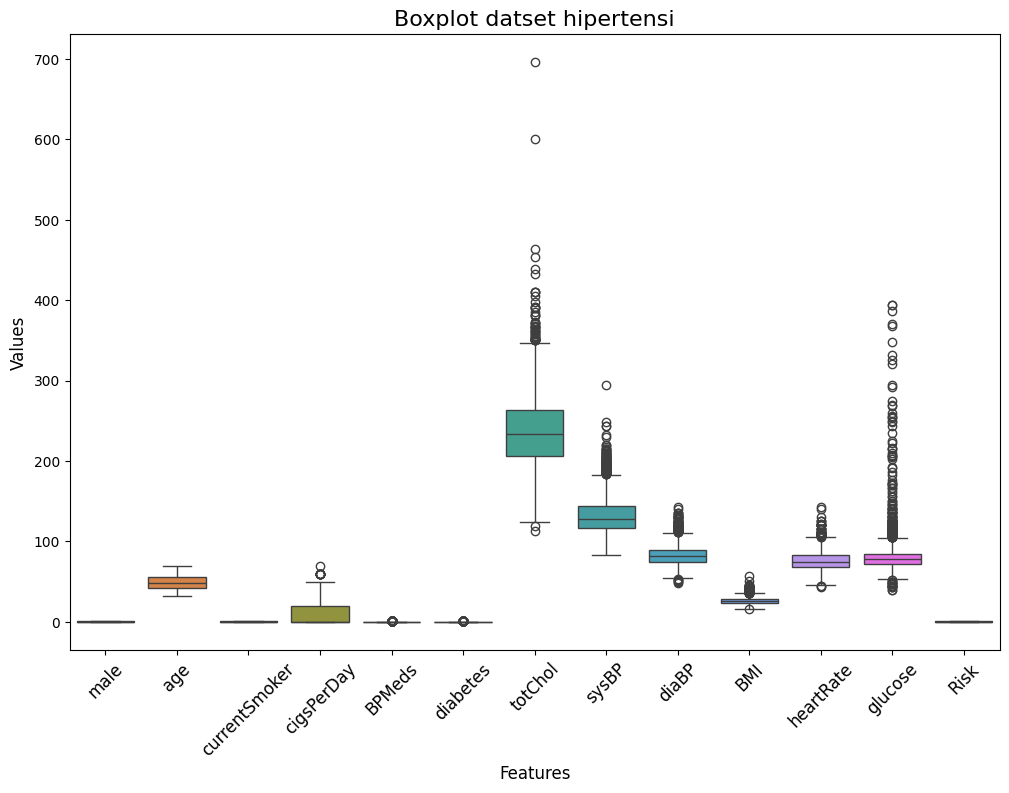

In [ ]:
plt.figure(figsize=(12, 8))
# Convert the PySpark DataFrame to Pandas before plotting
pandas_df = df.toPandas()
sns.boxplot(data=pandas_df)  # Use the converted Pandas DataFrame
plt.title("Boxplot datset hipertensi", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.show()

In [ ]:
from pyspark.sql.functions import col, expr, when

def remove_outliers(df, columns):
    for column in columns:
        # Hitung Q1 dan Q3 menggunakan approxQuantile
        q1, q3 = df.approxQuantile(column, [0.25, 0.75], 0)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Ganti nilai outlier dengan batas bawah atau atas
        df = df.withColumn(
            column,
            when(col(column) < lower_bound, lower_bound)
            .when(col(column) > upper_bound, upper_bound)
            .otherwise(col(column))
        )

    return df


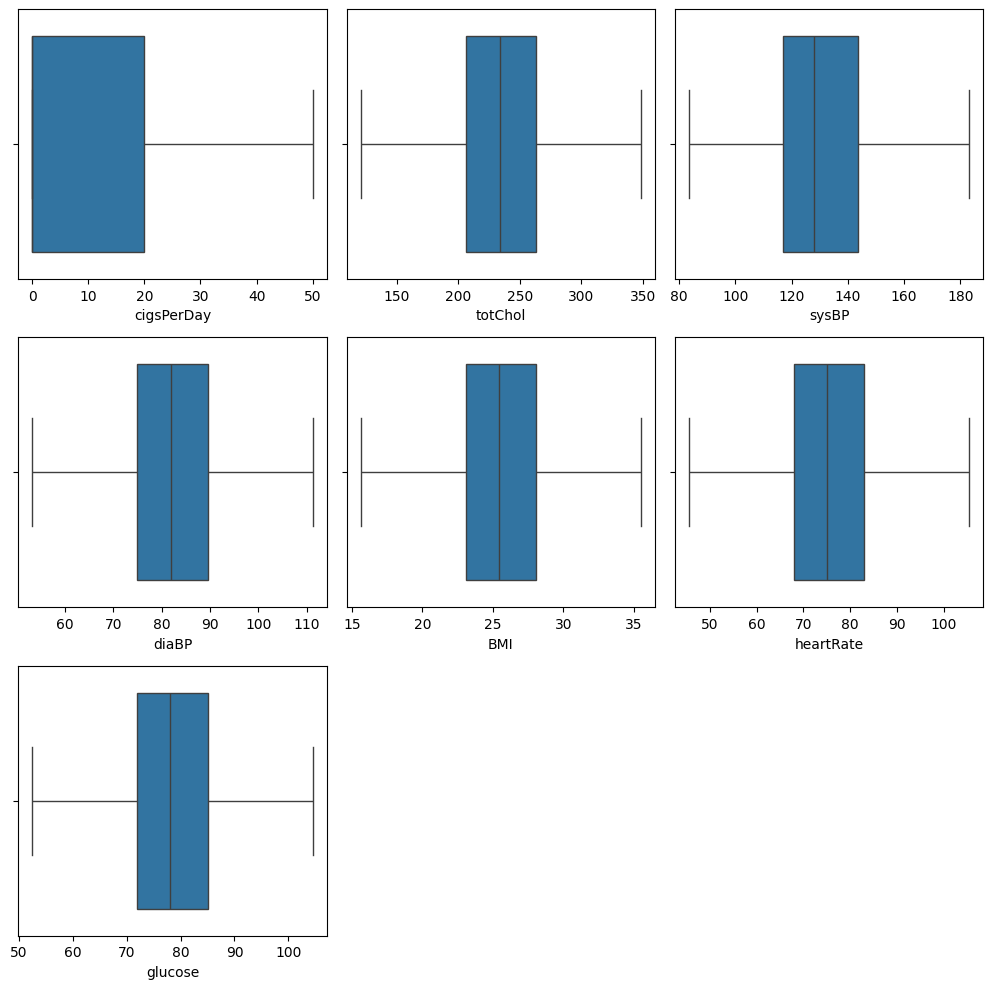

In [ ]:
from pyspark.sql.functions import col, when
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk menghapus outlier menggunakan IQR
def remove_outliers_pyspark(df, columns):
    for column in columns:
        # Hitung Q1 dan Q3
        q1, q3 = df.approxQuantile(column, [0.25, 0.75], 0)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Ganti nilai outlier dengan batas bawah/atas
        df = df.withColumn(
            column,
            when(col(column) < lower_bound, lower_bound)
            .when(col(column) > upper_bound, upper_bound)
            .otherwise(col(column))
        )
    return df

# Mendefinisikan kolom untuk penghapusan outlier
columns_to_clean = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
df = remove_outliers_pyspark(df, columns_to_clean)

# Mengonversi PySpark DataFrame ke Pandas untuk plotting
df_pd = df.select(columns_to_clean).toPandas()

# Menentukan jumlah kolom dan baris untuk plot
num_cols = len(columns_to_clean[1:])  # Kolom untuk diplot
num_rows = (num_cols + 2) // 3  # Jumlah baris
num_cols_per_row = min(num_cols, 3)  # Kolom per baris maksimum 3

plt.figure(figsize=(10, 10), facecolor='white')
plotnumber = 1

# Membuat boxplot untuk setiap kolom
for column in columns_to_clean[1:]:
    ax = plt.subplot(num_rows, num_cols_per_row, plotnumber)  # Mengatur layout grid
    sns.boxplot(data=df_pd, x=column, ax=ax)
    plt.xlabel(column, fontsize=10)
    plotnumber += 1

plt.tight_layout()  # Mengatur jarak antar subplot
plt.show()


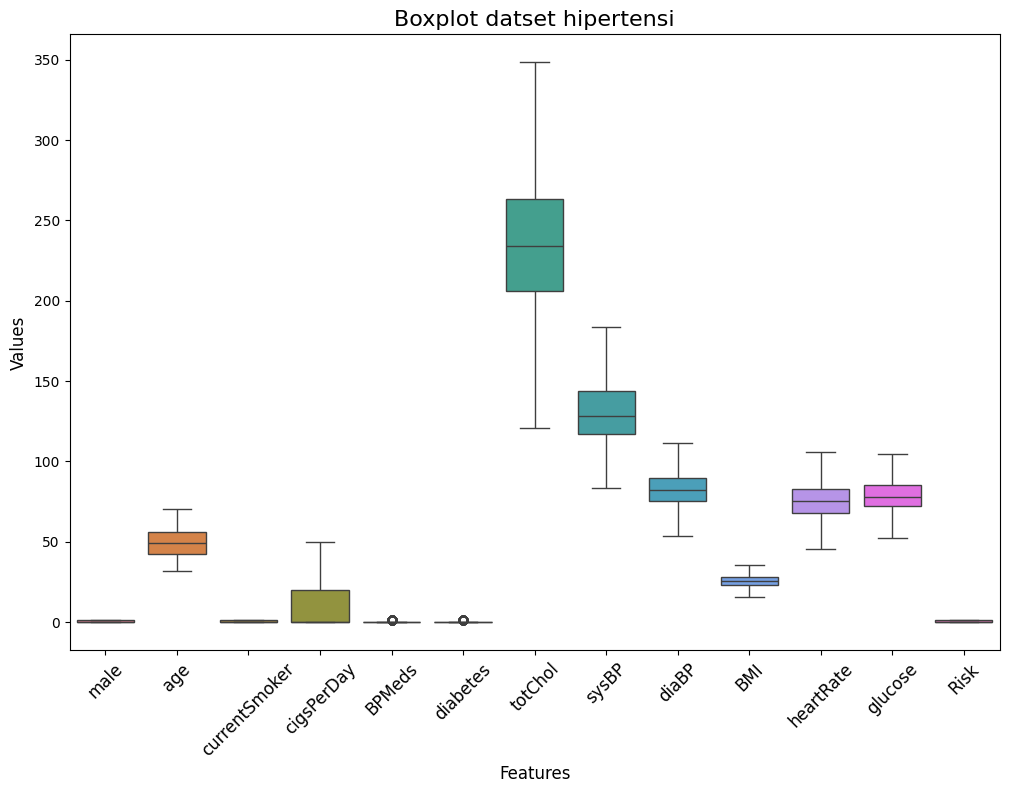

In [ ]:
plt.figure(figsize=(12, 8))
# Convert the PySpark DataFrame to Pandas before plotting
pandas_df = df.toPandas()
sns.boxplot(data=pandas_df)  # Use the converted Pandas DataFrame
plt.title("Boxplot datset hipertensi", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.show()

2.10 Visualisasi matrix corelasi

visualisai di bawah menunnjukan korelasi tiap fiitur, korelasi tertinggi terhadap fitur risk berada pada sysBp dengan nila 0,7 dan diaBp dengan nilai 0,62

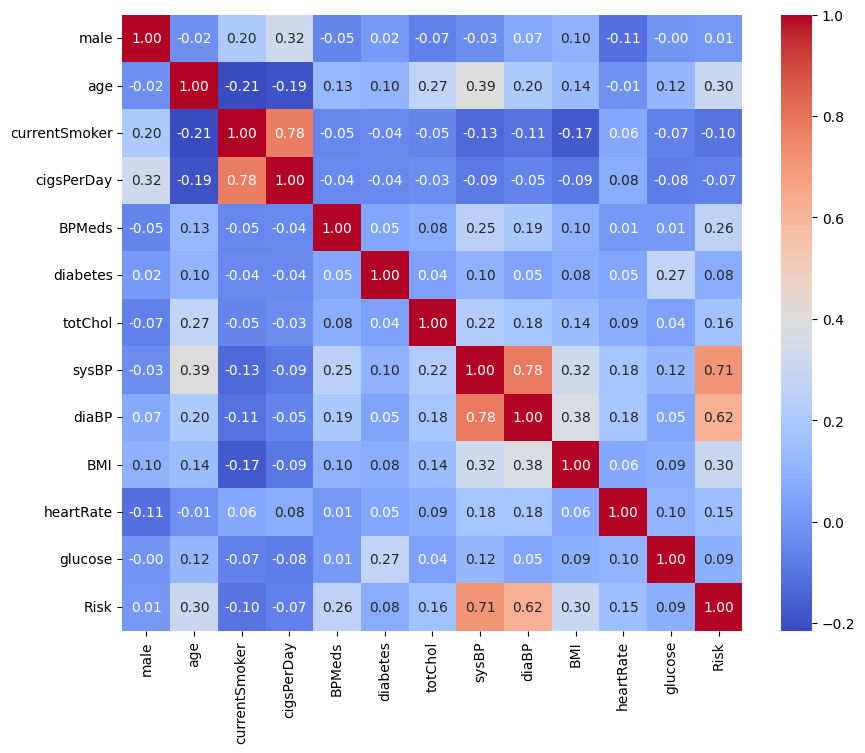

In [ ]:
# visualisai data menggunakan heatmap, melihat korelaso antar variable(analisis bivariet )
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

# Calculate correlation matrix using the Pandas DataFrame
corr_matrix = pandas_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

2.12 Penjelasan visualisasi

Korelasi Antar Fitur (Heatmap)
Heatmap ini menunjukkan korelasi antara variabel-variabel dalam dataset. Nilai korelasi berkisar antara -1 hingga 1:

- Fitur sysBP memiliki korelasi yang kuat dengan diaBP (0.78), menunjukkan hubungan erat antara tekanan sistolik dan diastolik.
- age memiliki korelasi moderat dengan sysBP (0.39) dan Risk (0.31), menunjukkan bahwa usia lebih tua cenderung meningkatkan tekanan darah sistolik dan risiko hipertensi.
- diabetes menunjukkan korelasi moderat dengan glucose (0.62), sesuai dengan hubungan biologis antara diabetes dan kadar glukosa darah.
- Korelasi antara sebagian besar variabel lainnya relatif rendah, menandakan hubungan lemah.


# 3. Ekplorasi data

3.1 Vsiualisasi pie chart

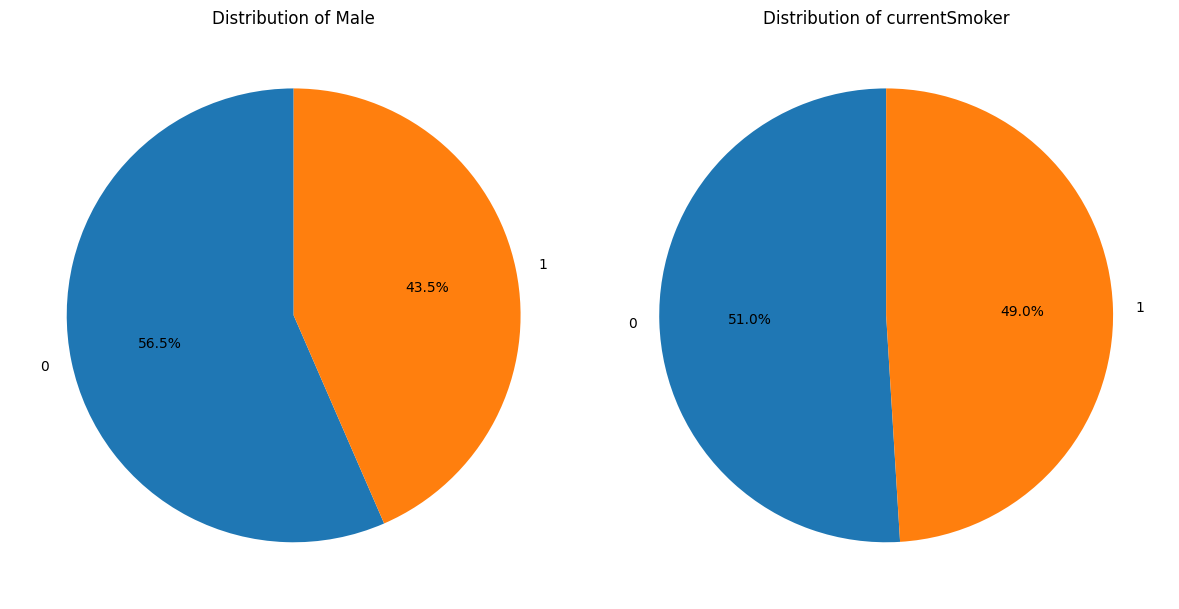

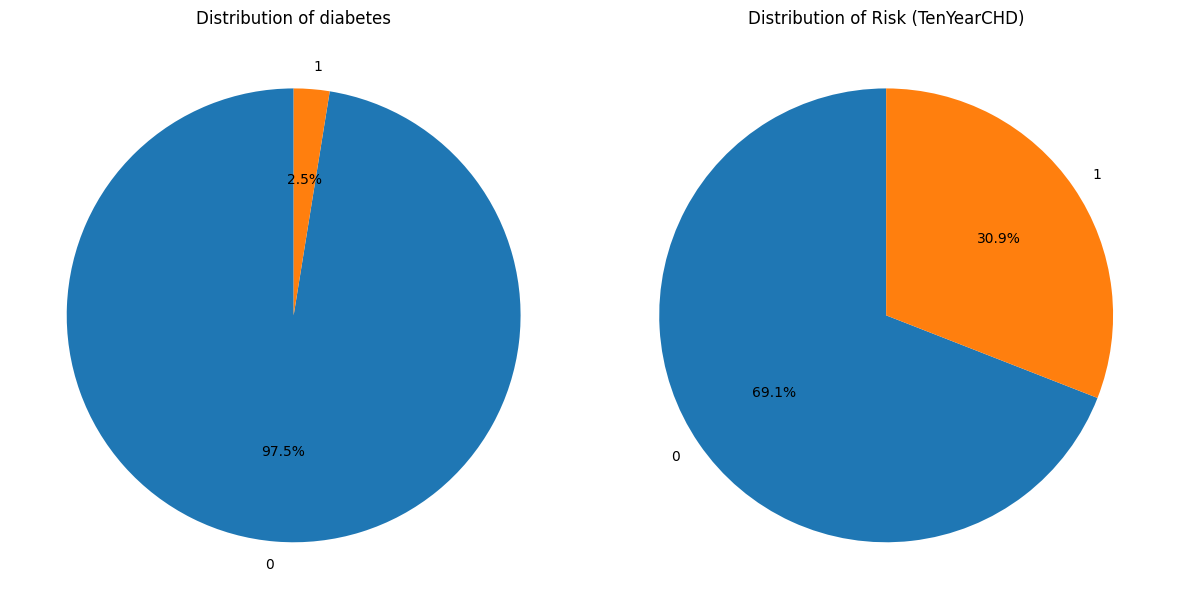

In [ ]:


# Create the pie chart
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Create a subplot for the first pie chart
male_counts = pandas_df['male'].value_counts()
plt.pie(male_counts, labels=male_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Male')

plt.subplot(1, 2, 2)  # Create a subplot for the second pie chart
currentSmoker_counts = pandas_df['currentSmoker'].value_counts()
plt.pie(currentSmoker_counts, labels=currentSmoker_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of currentSmoker')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
diabetes_counts = pandas_df['diabetes'].value_counts()
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of diabetes')

plt.subplot(1, 2, 2)
# Assuming 'Risk' represents the risk column (previously TenYearCHD)
risk_counts = pandas_df['Risk'].value_counts()  # Changed 'TenYearCHD' to 'Risk'
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Risk (TenYearCHD)') # Kept the original title with clarification
plt.tight_layout()
plt.show()

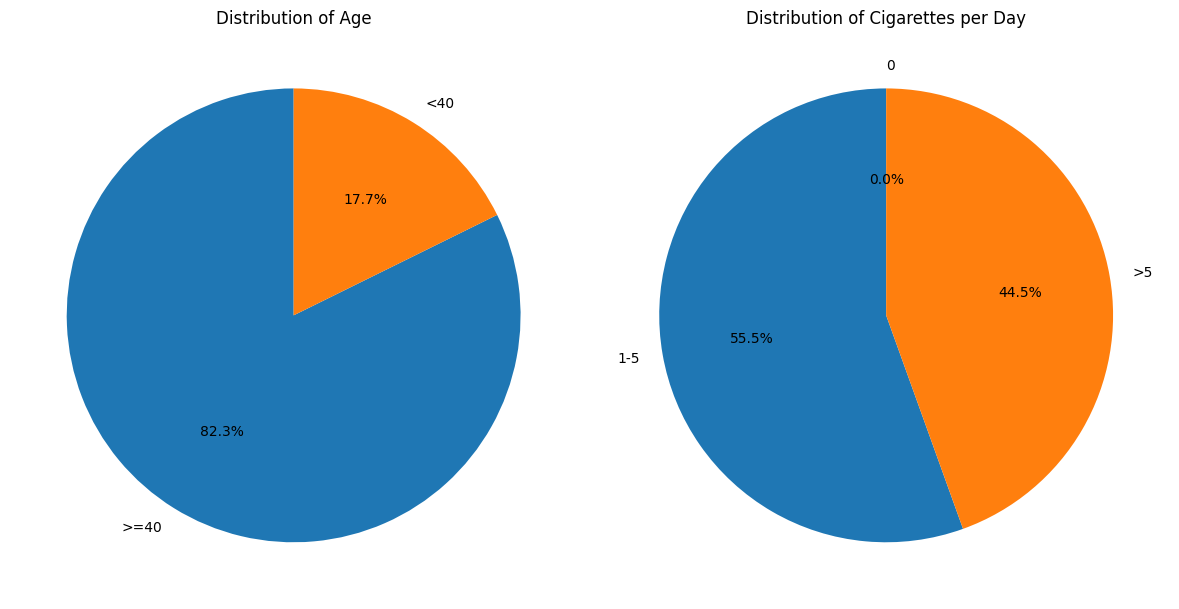

In [ ]:

import matplotlib.pyplot as plt
import numpy as np # Import numpy

# Assuming pandas_df is your Pandas DataFrame
# Create age categories
pandas_df['age_category'] = pd.cut(pandas_df['age'], bins=[0, 40, pandas_df['age'].max()], labels=['<40', '>=40'])

# Create cigsPerDay categories, ensuring bins are monotonically increasing
# Convert 'cigsPerDay' to numeric, handling errors
pandas_df['cigsPerDay'] = pd.to_numeric(pandas_df['cigsPerDay'], errors='coerce')
max_cigs = pandas_df['cigsPerDay'].max()

# Check if max_cigs is NaN and replace with 0 if necessary
if np.isnan(max_cigs):  # Check for NaN using numpy
    max_cigs = 0

bins = [-1, 0, 5, max_cigs + 1]  # Add 1 to ensure last bin is greater than max value
pandas_df['cigsPerDay_category'] = pd.cut(pandas_df['cigsPerDay'], bins=bins, labels=['0', '1-5', '>5'], right=False, include_lowest=True, duplicates='drop')  # Set right=False, include_lowest=True, duplicates='drop'


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
age_counts = pandas_df['age_category'].value_counts()
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
cigs_counts = pandas_df['cigsPerDay_category'].value_counts()
plt.pie(cigs_counts, labels=cigs_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cigarettes per Day')

plt.tight_layout()
plt.show()

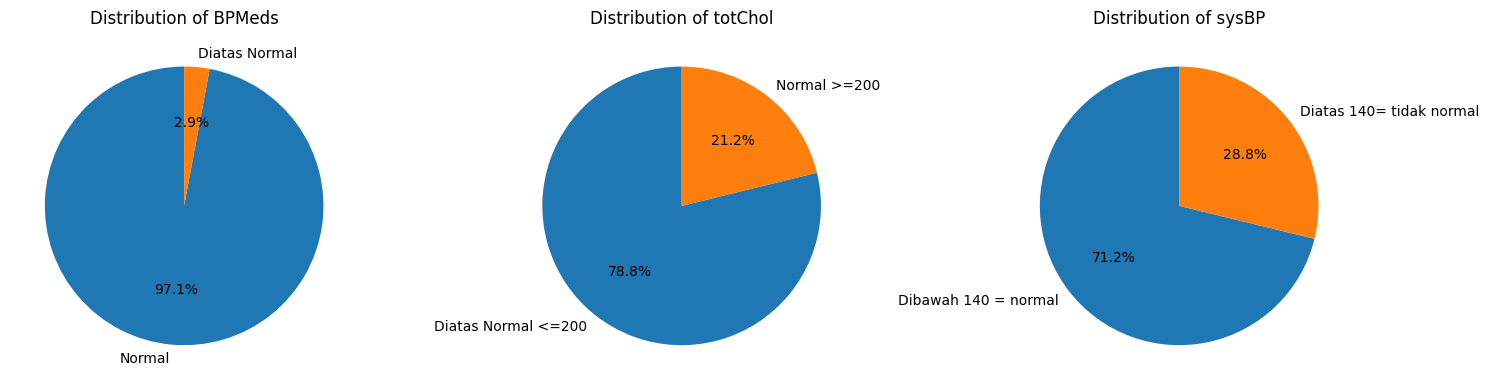

In [ ]:

import matplotlib.pyplot as plt
import numpy as np  # Import numpy for NaN handling

# Assuming pandas_df is your Pandas DataFrame
# Create categories for BPMeds and totChol
# Ensure bins are monotonically increasing by checking max value

# Convert 'BPMeds' to numeric, handling errors
pandas_df['BPMeds'] = pd.to_numeric(pandas_df['BPMeds'], errors='coerce')

# Calculate max_bpm, handling NaN values
max_bpm = pandas_df['BPMeds'].max()
max_bpm = 0 if np.isnan(max_bpm) else max_bpm  # Replace NaN with 0

bins_bpm = [-1, 0.5, max_bpm + 1] if max_bpm > 0.5 else [-1, 0.5, 1]  # Add 1 if max_bpm > 0.5, otherwise use 1

pandas_df['BPMeds_category'] = pd.cut(pandas_df['BPMeds'], bins=bins_bpm, labels=['Normal', 'Diatas Normal'], include_lowest=True, duplicates='drop')

# Ensure bins are monotonically increasing for totChol
# Convert 'totChol' to numeric, handling errors
pandas_df['totChol'] = pd.to_numeric(pandas_df['totChol'], errors='coerce')

max_totchol = pandas_df['totChol'].max()
max_totchol = 0 if np.isnan(max_totchol) else max_totchol  # Replace NaN with 0

bins_totchol = [-1, 200, max_totchol + 1] if max_totchol > 200 else [-1, 200, 201]  # Add 1 if max_totchol > 200, otherwise use 201

pandas_df['totChol_category'] = pd.cut(pandas_df['totChol'], bins=bins_totchol, labels=['Normal >=200', 'Diatas Normal <=200'], include_lowest=True, duplicates='drop')

pandas_df['sisbp_category'] = pd.cut(pandas_df['sysBP'], bins=[-1, 140, pandas_df['sysBP'].max()], labels=['Dibawah 140 = normal', 'Diatas 140= tidak normal'], include_lowest=True, duplicates='drop')


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
bpm_counts = pandas_df['BPMeds_category'].value_counts()
plt.pie(bpm_counts, labels=bpm_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of BPMeds')

plt.subplot(1, 3, 2)
totchol_counts = pandas_df['totChol_category'].value_counts()
plt.pie(totchol_counts, labels=totchol_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of totChol')

plt.subplot(1, 3, 3)
sisbp_counts = pandas_df['sisbp_category'].value_counts()
plt.pie(sisbp_counts, labels=sisbp_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of sysBP')

plt.tight_layout()
plt.show()

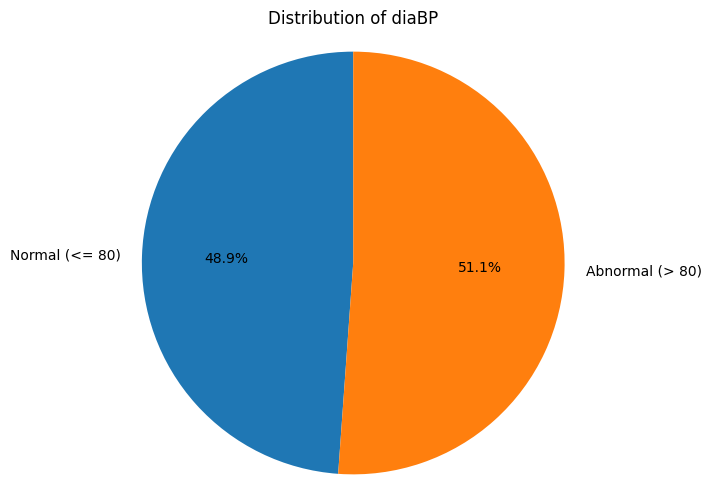

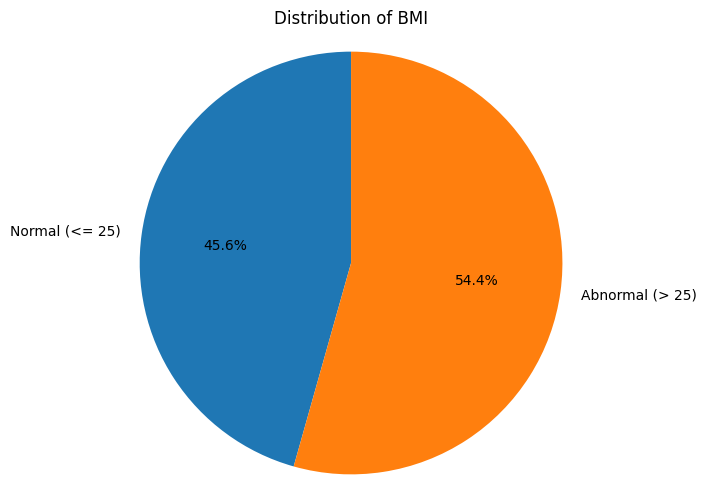

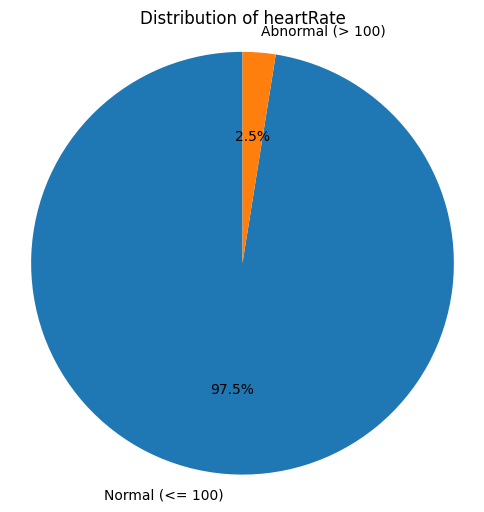

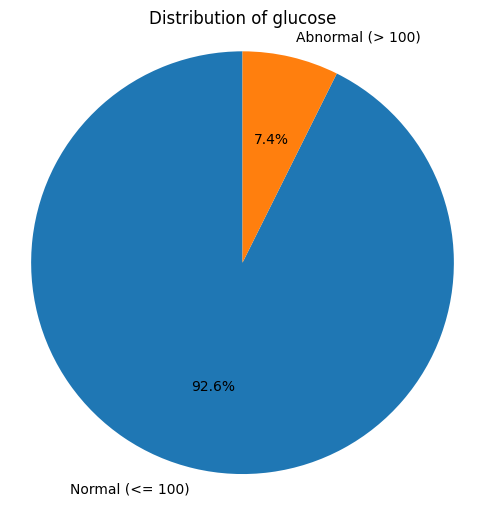

In [ ]:
# prompt: buatkan visul pie chart normal ( dan nilai normalnya) dan tidak normal(dan nilai tidak normalnya), untuk kolom diabp, BMI, Herat Rate, glucose

import matplotlib.pyplot as plt

# Assuming pandas_df is your Pandas DataFrame and contains columns 'diabp', 'BMI', 'heartRate', 'glucose'

# Function to create pie charts for normal and abnormal values
def create_pie_chart(data, column_name, normal_threshold, abnormal_threshold=None):
    if abnormal_threshold is None:  # Default abnormal threshold if not provided
      abnormal_threshold = float('inf')

    # Count normal and abnormal values
    # Check if the column name exists in the DataFrame
    if column_name not in data.columns:
        print(f"Column '{column_name}' not found in the DataFrame. Please check the column name.")
        return  # Exit the function if the column is not found

    # Convert the column to numeric if it's not already
    data[column_name] = pd.to_numeric(data[column_name], errors='coerce') #convert to numeric, coerce errors to NaN

    normal_count = len(data[data[column_name] <= normal_threshold])
    abnormal_count = len(data[data[column_name] > normal_threshold])

    # Correct for abnormal count for when the abnormal_threshold is provided
    abnormal_count = len(data[(data[column_name] > normal_threshold) & (data[column_name] <= abnormal_threshold)])

    # Create pie chart
    labels = [f'Normal (<= {normal_threshold})', f'Abnormal (> {normal_threshold})']
    sizes = [normal_count, abnormal_count]

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {column_name}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Call the function for each column, making sure column names are correct
create_pie_chart(pandas_df, 'diaBP', 80, 100)  # Example normal range for diastolic blood pressure, changed 'diabp' to 'diaBP'
create_pie_chart(pandas_df, 'BMI', 25)  # Example normal range for BMI
create_pie_chart(pandas_df, 'heartRate', 100)  # Example normal range for heart rate
create_pie_chart(pandas_df, 'glucose', 100)  # Example normal range for glucose

2.8 visualisasi barchart

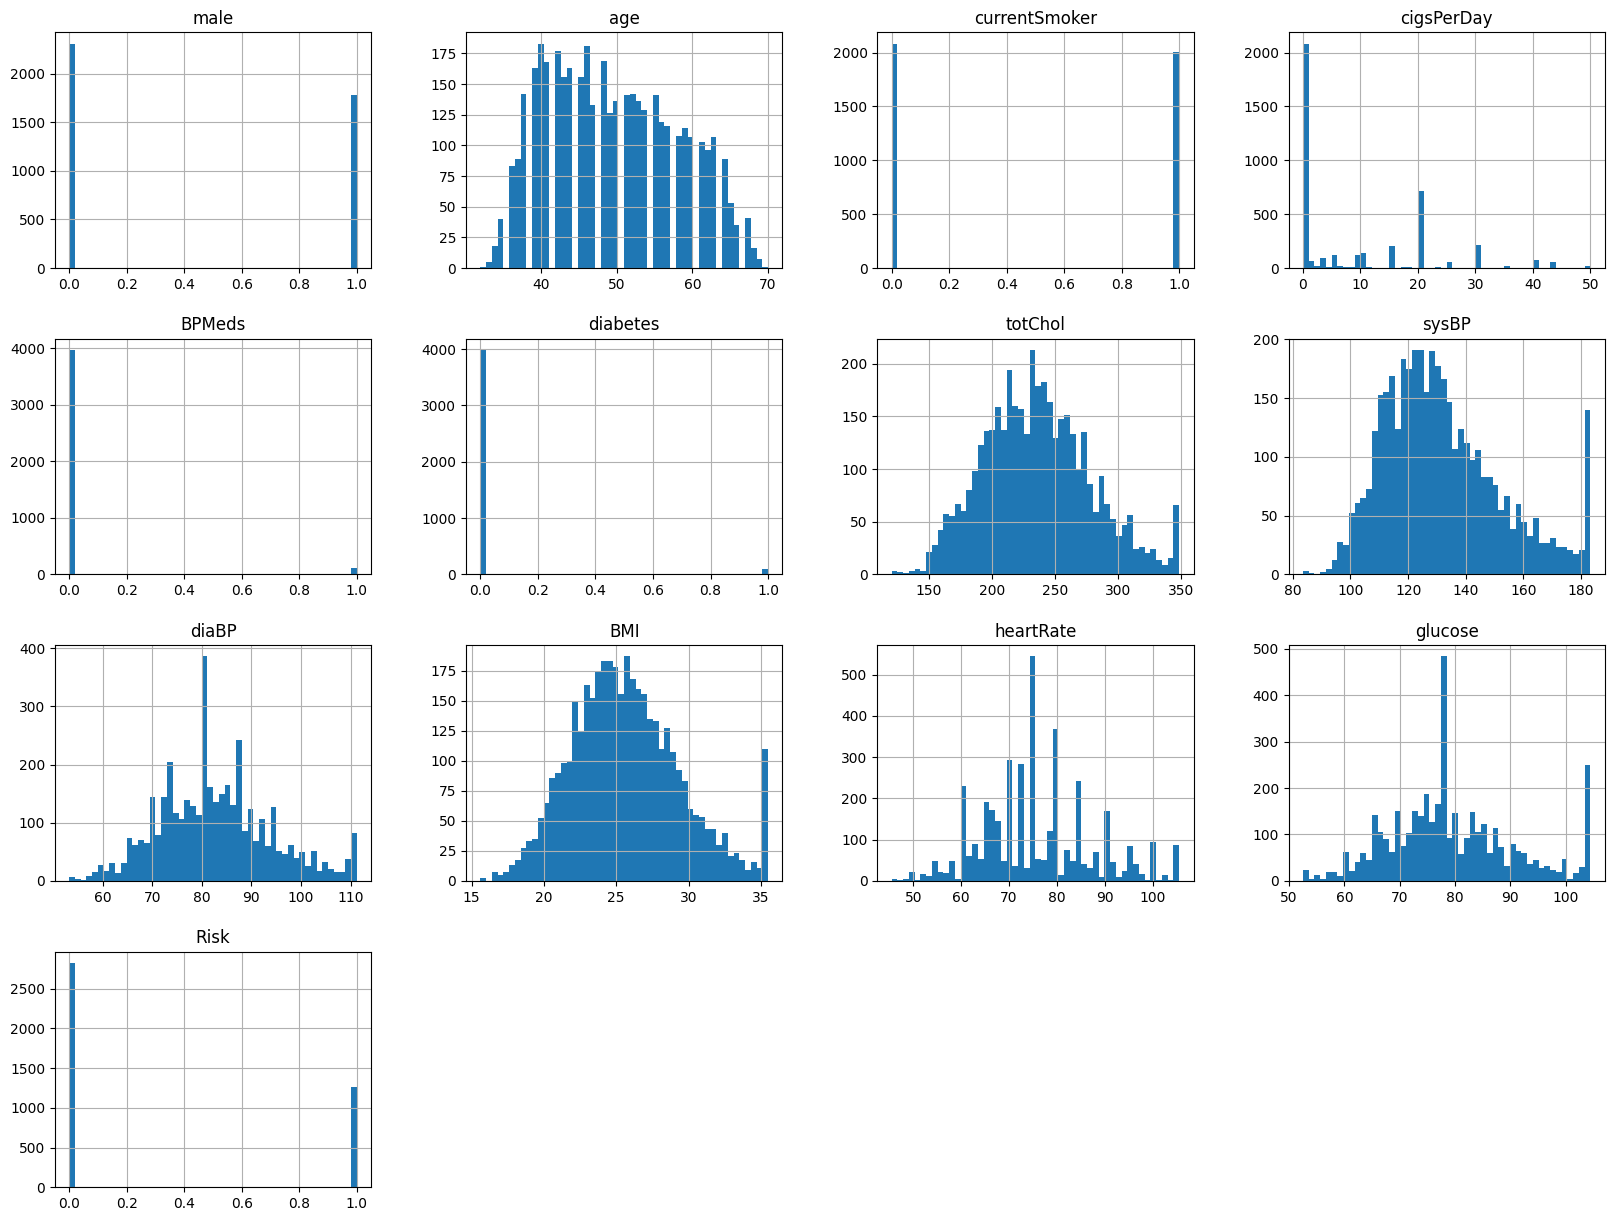

In [ ]:
# analisis dan visualisasi data univariet
pandas_df = df.toPandas() # convert to pandas DataFrame
pandas_df.hist(bins=50, figsize=(20,15))
plt.show()

2.9 visualisasi boxplot

visualisasi di bawah menunjukan banyaknya data oulier tiap kolom yang. hal ini perlu di lakukan pembersihan outlier yang ada agar efisiensi meningkat

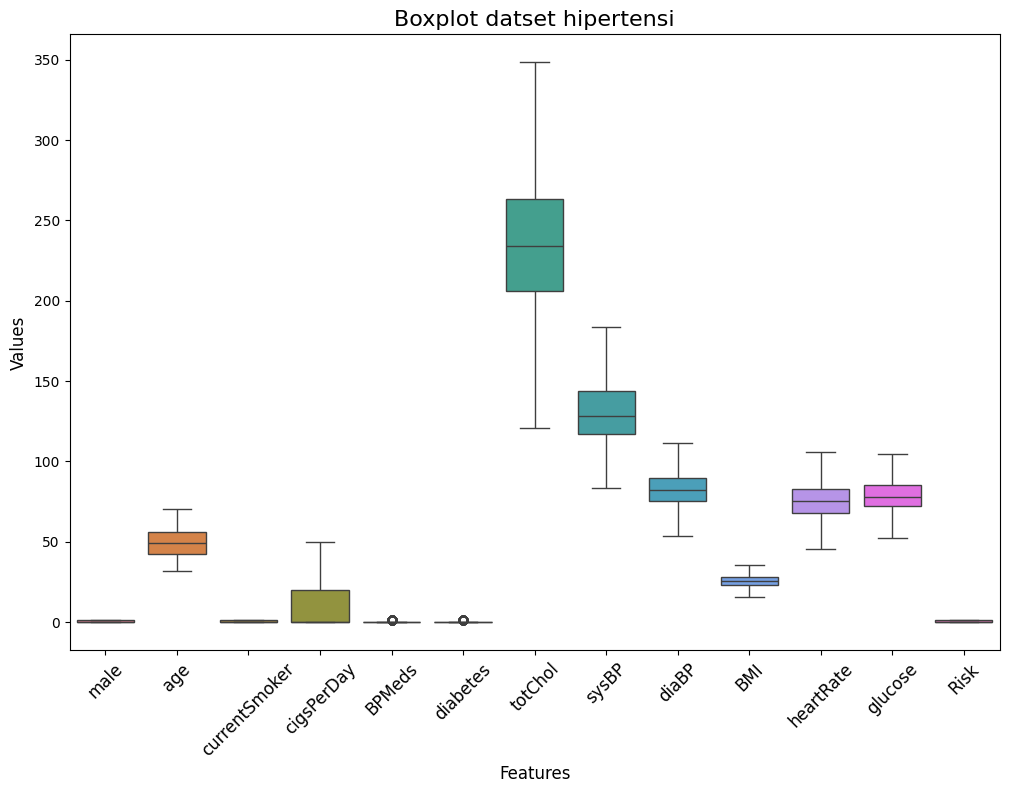

In [ ]:
plt.figure(figsize=(12, 8))
# Convert the PySpark DataFrame to Pandas before plotting
pandas_df = df.toPandas()
sns.boxplot(data=pandas_df)  # Use the converted Pandas DataFrame
plt.title("Boxplot datset hipertensi", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.show()

2.10 visualisasi scater plot

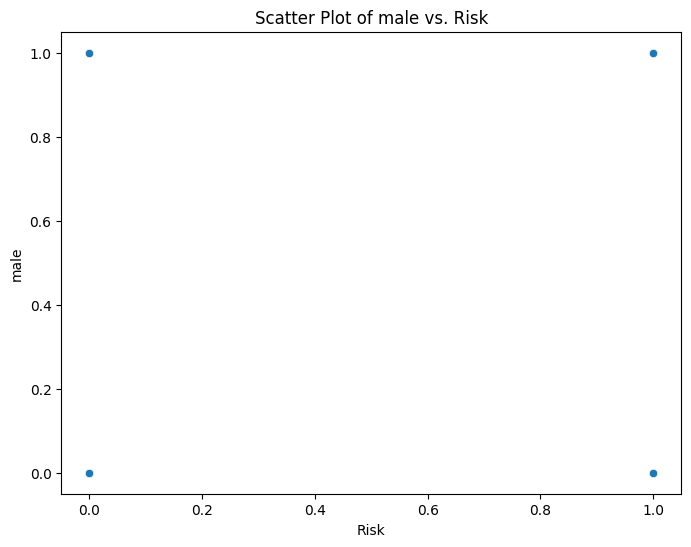

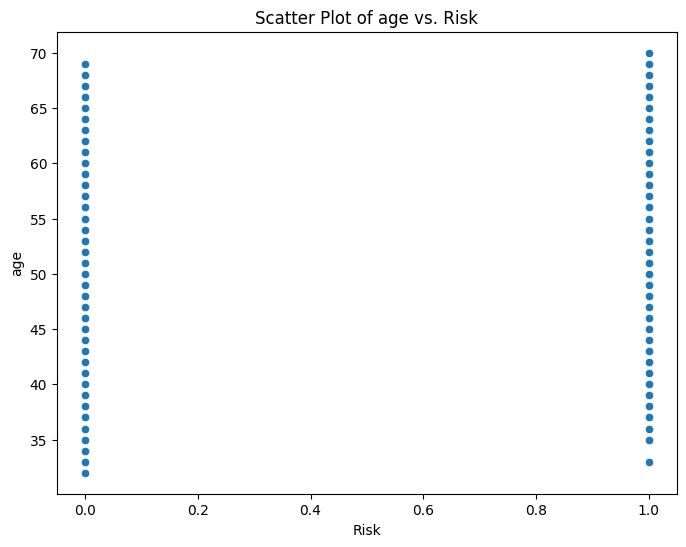

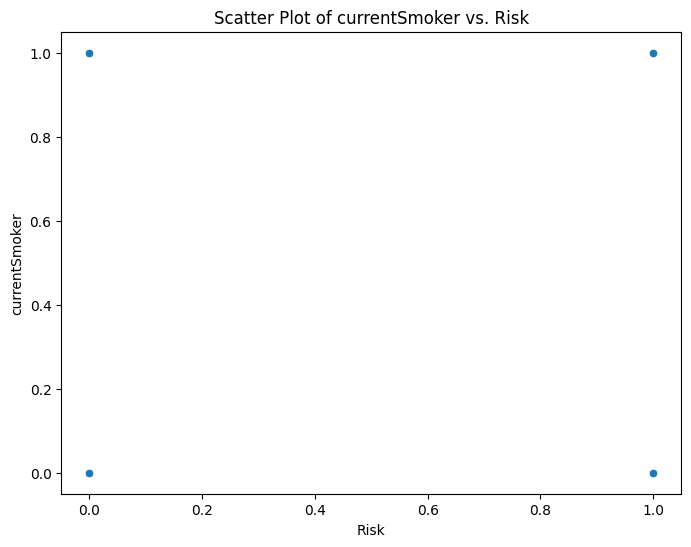

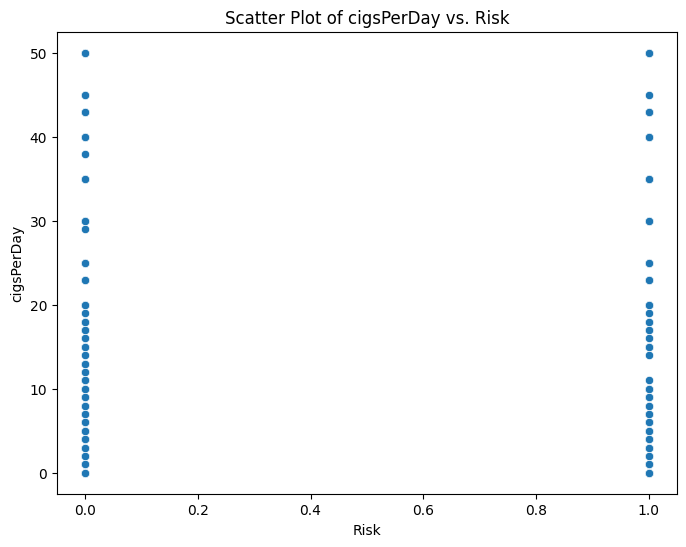

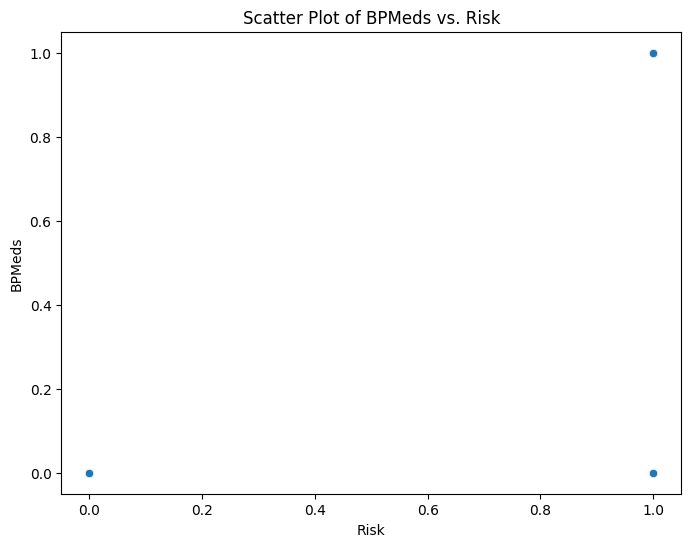

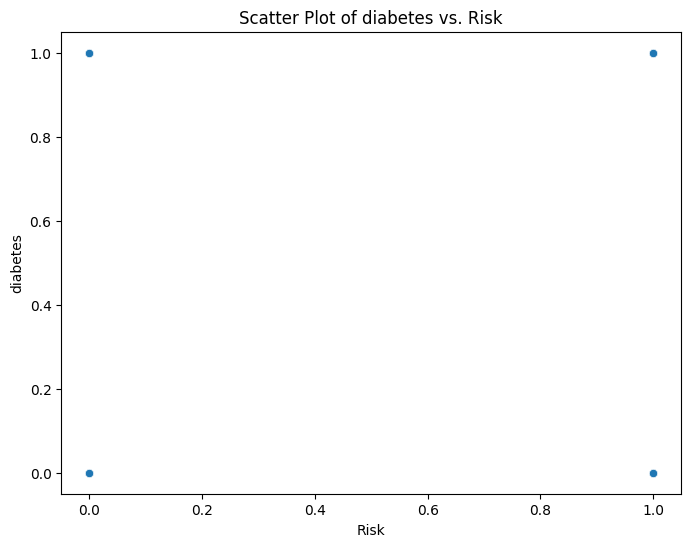

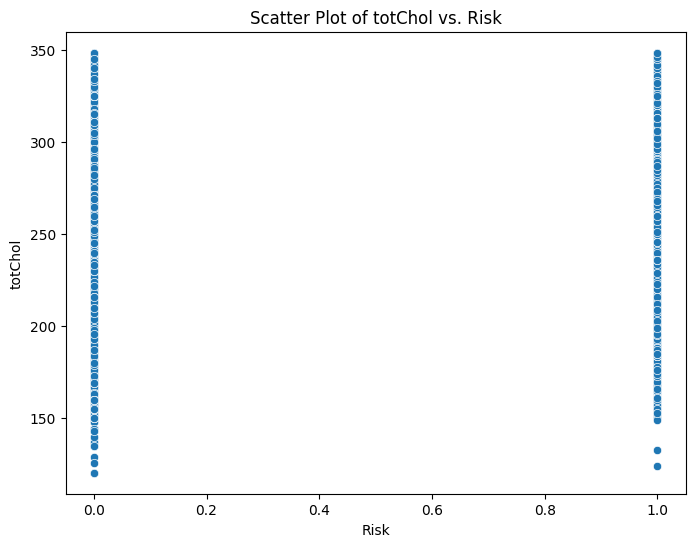

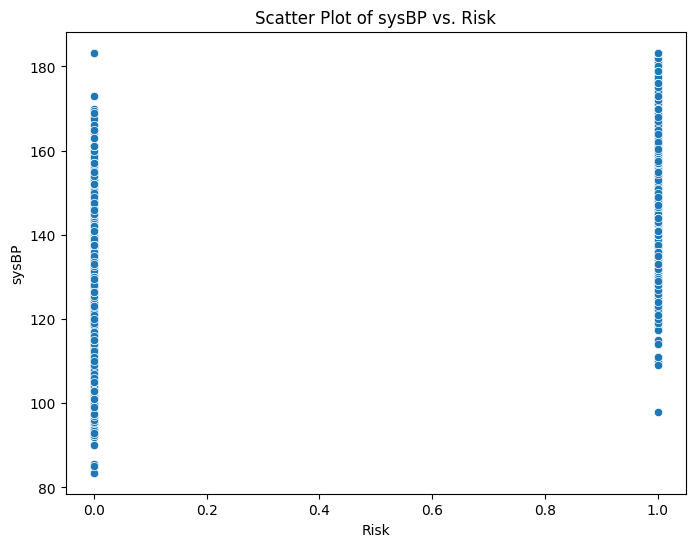

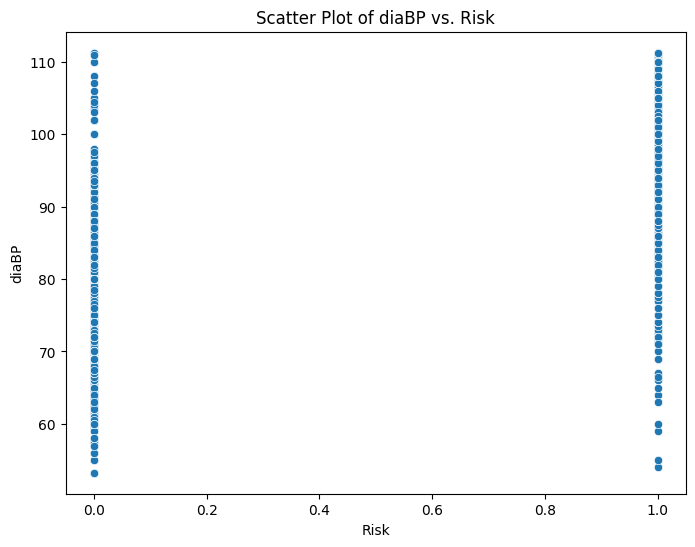

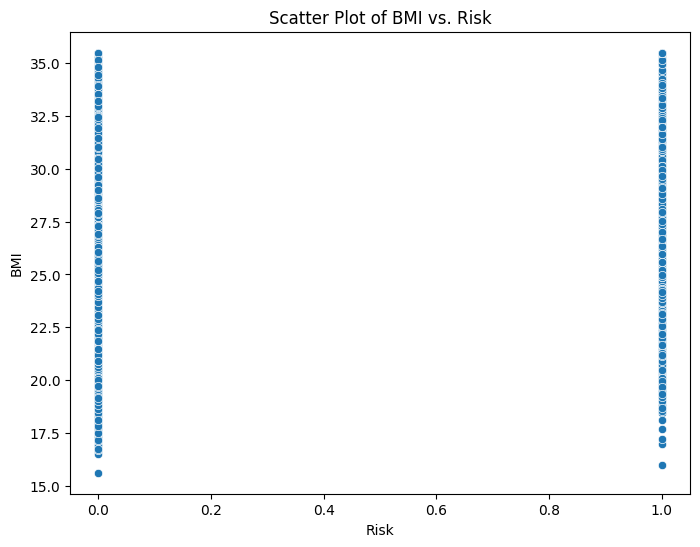

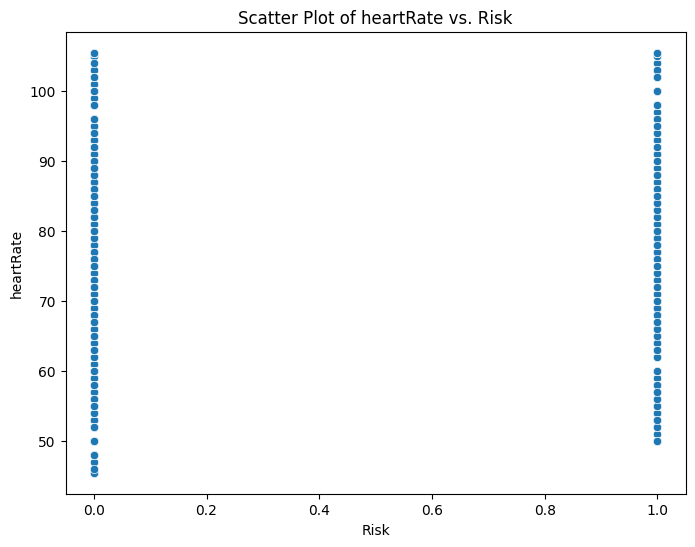

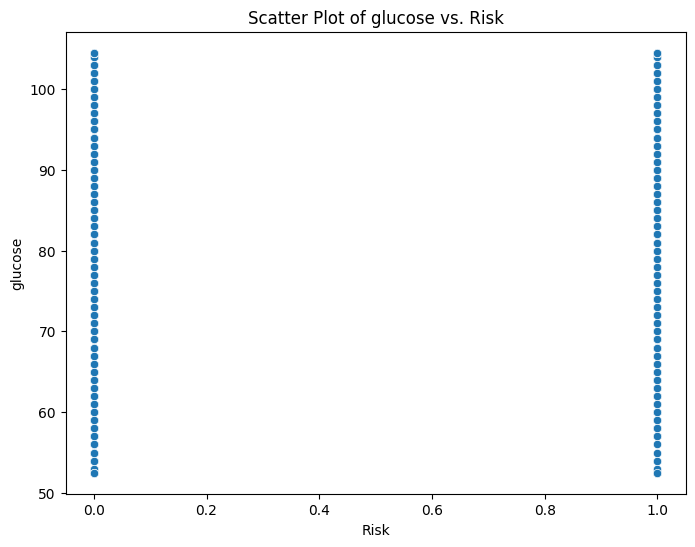

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pandas_df' is your Pandas DataFrame (converted from the PySpark DataFrame)
# Replace 'pandas_df' with your actual DataFrame variable name if different

# Create scatter plots for each feature against 'Risk'
for col in pandas_df.columns:
  if col != 'Risk':  # Skip the 'Risk' column itself
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.scatterplot(x='Risk', y=col, data=pandas_df)
    plt.title(f'Scatter Plot of {col} vs. Risk')
    plt.xlabel('Risk')
    plt.ylabel(col)
    plt.show()

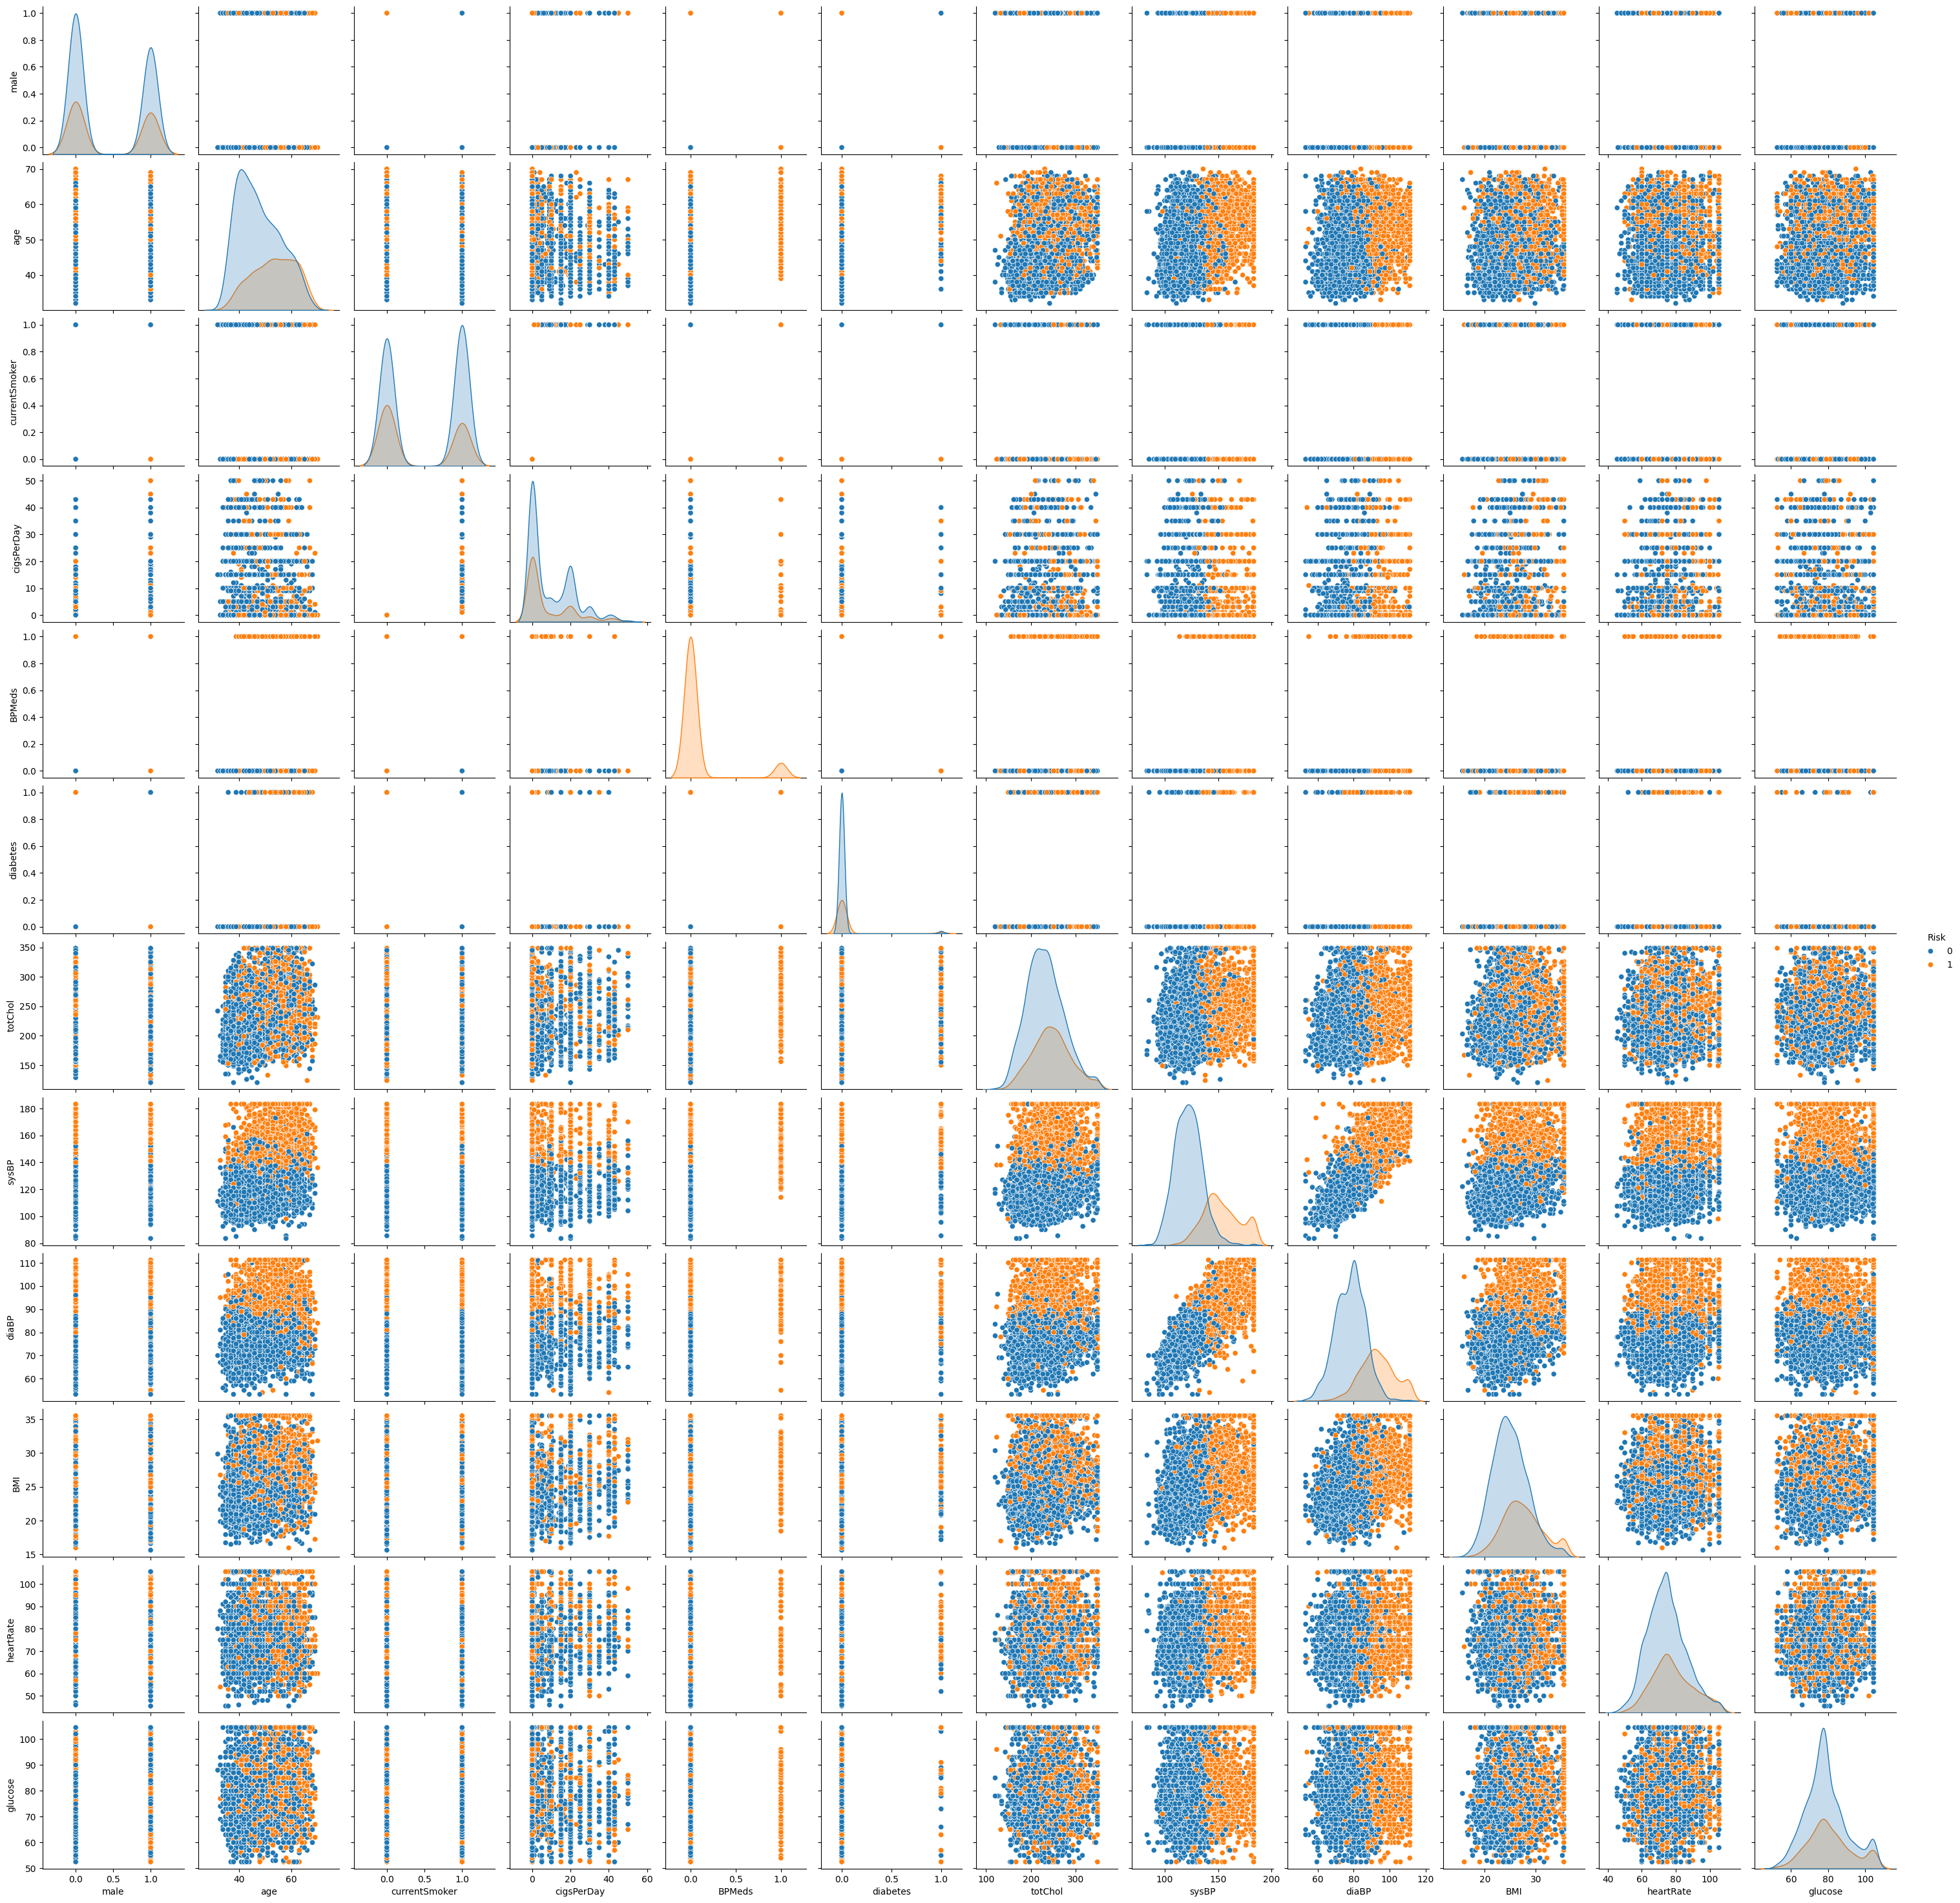

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(pandas_df, hue='Risk')  # 'Risk' should be the correct column name
plt.show()

Boxplot Data

Boxplot ini menggambarkan distribusi data untuk masing-masing fitur.

- cigsPerDay, sysBP, dan diaBP memiliki banyak outlier, menunjukkan variabilitas yang tinggi pada kebiasaan merokok dan tekanan darah.
- Fitur seperti BMI, glucose, dan totChol memiliki distribusi yang lebih terpusat, tetapi tetap menunjukkan outlier.
- Data kategorikal seperti male, BPMeds, dan diabetes menunjukkan distribusi yang terpisah jelas, mencerminkan data biner atau hampir biner.

Histogram Fitur-Fitur
Histogram menunjukkan distribusi frekuensi untuk setiap fitur.

Sumbu X: Rentang nilai fitur.

Sumbu Y: Frekuensi kemunculan nilai dalam rentang tersebut.

- age menunjukkan distribusi mendekati normal dengan puncak di usia 50-60 tahun, sesuai dengan prevalensi hipertensi pada usia menengah hingga lanjut.
- currentSmoker dan diabetes memiliki distribusi biner, menunjukkan banyak individu yang tidak merokok atau tidak memiliki diabetes.
- sysBP dan diaBP memiliki distribusi miring ke kanan (skewed), mencerminkan sebagian individu dengan tekanan darah yang sangat tinggi.
- glucose menunjukkan distribusi yang tidak simetris, dengan sebagian besar individu memiliki kadar glukosa normal tetapi beberapa memiliki nilai sangat tinggi.

# 4. Spiliting data dan Over Sampling

4.1 Membagi data set menjadi 2 ( Spliting data)

In [ ]:
from imblearn.over_sampling import SMOTE
from pyspark.ml.feature import VectorAssembler

# Convert PySpark DataFrame to Pandas DataFrame
df_pandas = df.toPandas()
features = ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes', 'totChol', 'sysBP', 'diaBP',
            'BMI', 'heartRate', 'glucose']
X = df_pandas[features]
y = df_pandas['Risk']

4.2 Cek Over sampling

dari hasil oupt di bawah , perlu adanya balancinf data. hal ini di karenakan data risk 0 lebih dominan yang membuat model akan lebih memahami individu yang tidak terkena hipotensi

Risk
0    2825
1    1265
Name: count, dtype: int64


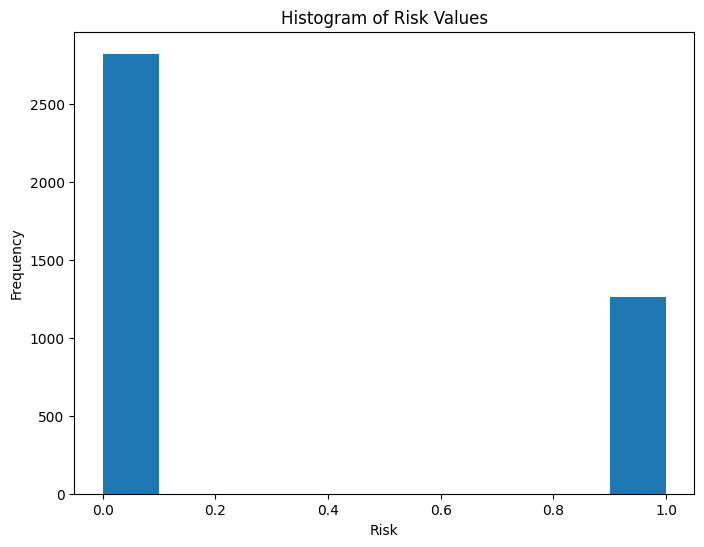

In [ ]:
import matplotlib.pyplot as plt

print(y.value_counts())


plt.figure(figsize=(8, 6))
plt.hist(y, bins=10)  # Use the 'y' Series directly
plt.xlabel('Risk') # Change x-axis label to 'Risk'
plt.ylabel('Frequency')
plt.title('Histogram of Risk Values') # Change title to reflect 'Risk'
plt.show()

4.3 balancing data dan soliting train dan test

In [ ]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to pandas DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=features)
df_resampled['Risk'] = y_resampled

# Convert the resampled DataFrame back to Spark DataFrame
df_spark_resampled = spark.createDataFrame(df_resampled)

# 2. Split data into training and testing sets (80% train, 20% test)
train_df, test_df = df_spark_resampled.randomSplit([0.8, 0.2], seed=42)

# 3. Assemble features into a vector
assembler = VectorAssembler(inputCols=features, outputCol="features")
train_df = assembler.transform(train_df)
test_df = assembler.transform(test_df)

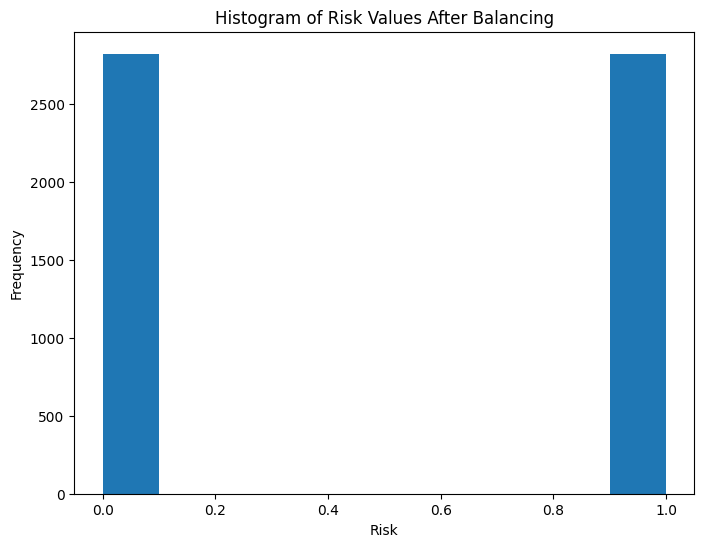

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_resampled is your target variable after balancing
plt.figure(figsize=(8, 6))
plt.hist(y_resampled, bins=10)
plt.xlabel('Risk')
plt.ylabel('Frequency')
plt.title('Histogram of Risk Values After Balancing')
plt.show()

# 5. metode random forest

Akurasi Model: 0.91


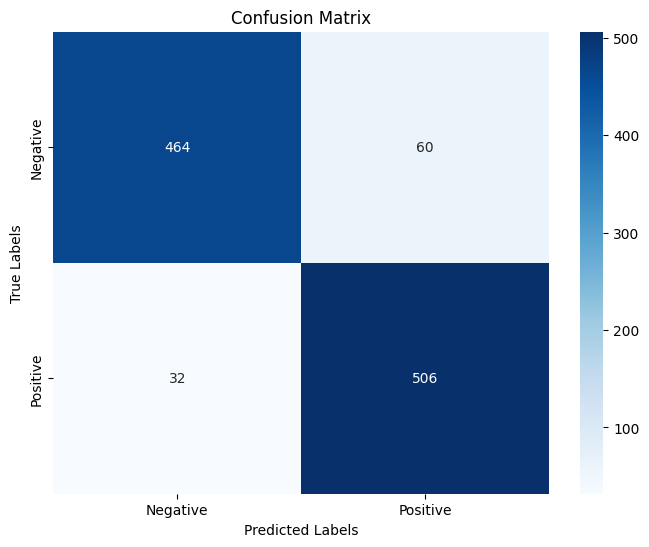


Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.89      0.91       524
    Positive       0.89      0.94      0.92       538

    accuracy                           0.91      1062
   macro avg       0.91      0.91      0.91      1062
weighted avg       0.91      0.91      0.91      1062



In [ ]:
# Import libraries
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyspark.sql.functions import col
from sklearn.model_selection import train_test_split

# Initialize Spark session
spark = SparkSession.builder.appName("RandomForestClassifier").getOrCreate()


# 4. Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(featuresCol="features", labelCol="Risk", numTrees=100, seed=42)

# 5. Fit model with training data
rf_model = rf_classifier.fit(train_df)

# 6. Predict using test data
predictions = rf_model.transform(test_df)

# 7. Evaluate Model
# a. Accuracy
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="Risk", predictionCol="prediction", metricName="accuracy")
accuracy = accuracy_evaluator.evaluate(predictions)
print(f"Akurasi Model: {accuracy:.2f}")

# b. Confusion Matrix
conf_matrix = predictions.groupBy("Risk", "prediction").count().toPandas()
conf_matrix_pivot = conf_matrix.pivot(index="Risk", columns="prediction", values="count").fillna(0)

# c. Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pivot, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



# e. Classification Report
from sklearn.metrics import classification_report

def extract_labels_and_predictions(predictions):
    labels_and_preds = predictions.select("Risk", "prediction").rdd.map(lambda row: (row["Risk"], row["prediction"])).collect()
    y_true, y_pred = zip(*labels_and_preds)
    return y_true, y_pred

y_true, y_pred = extract_labels_and_predictions(predictions)
report = classification_report(y_true, y_pred, target_names=["Negative", "Positive"])
print("\nClassification Report:")
print(report)


ROC-AUC Score: 0.95


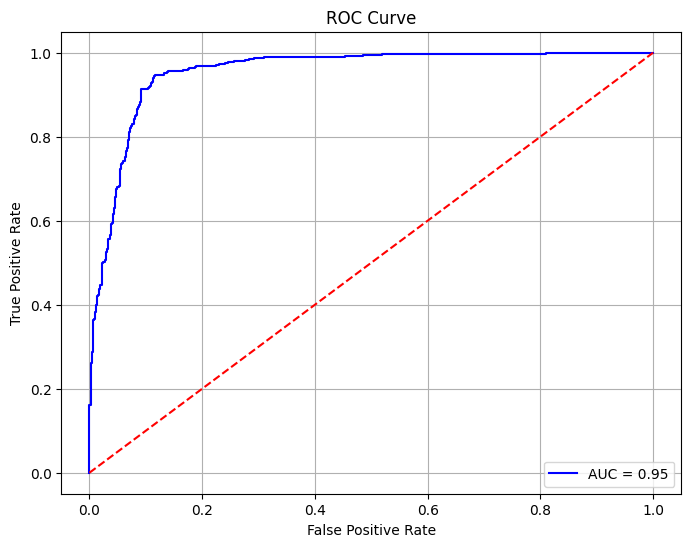

In [ ]:
# d. ROC-AUC Curve
# Probabilities for the positive class
evaluator_auc = BinaryClassificationEvaluator(labelCol="Risk", rawPredictionCol="probability", metricName="areaUnderROC")
auc_score = evaluator_auc.evaluate(predictions)
print(f"ROC-AUC Score: {auc_score:.2f}")

# Extract probabilities and compute ROC curve
probabilities = predictions.select("probability", "Risk").rdd.map(lambda row: (float(row["probability"][1]), row["Risk"])).collect()
probs, labels = zip(*probabilities)

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(labels, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 6. Gardient BOosting

Akurasi Model: 0.92


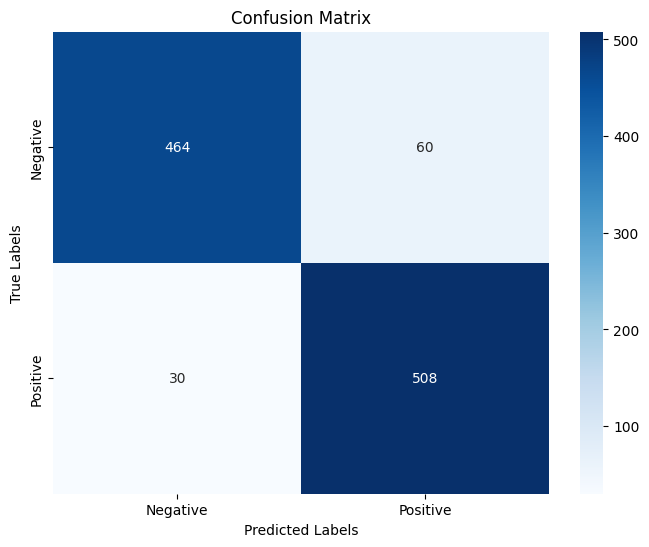


Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.89      0.91       524
    Positive       0.89      0.94      0.92       538

    accuracy                           0.92      1062
   macro avg       0.92      0.91      0.92      1062
weighted avg       0.92      0.92      0.92      1062



In [ ]:
# Import libraries
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyspark.sql.functions import col
from sklearn.model_selection import train_test_split

# Initialize Spark session
spark = SparkSession.builder.appName("GBTClassifier").getOrCreate()

# Assuming train_df and test_df are already created and preprocessed as PySpark DataFrames

# 4. Initialize Gradient Boosting Classifier (GBT)
gbt_classifier = GBTClassifier(featuresCol="features", labelCol="Risk", maxIter=100, seed=42)

# 5. Fit model with training data
gbt_model = gbt_classifier.fit(train_df)

# 6. Predict using test data
predictions = gbt_model.transform(test_df)

# 7. Evaluate Model
# a. Accuracy
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="Risk", predictionCol="prediction", metricName="accuracy")
accuracy = accuracy_evaluator.evaluate(predictions)
print(f"Akurasi Model: {accuracy:.2f}")

# b. Confusion Matrix
conf_matrix = predictions.groupBy("Risk", "prediction").count().toPandas()
conf_matrix_pivot = conf_matrix.pivot(index="Risk", columns="prediction", values="count").fillna(0)

# c. Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pivot, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



# e. Classification Report
from sklearn.metrics import classification_report

def extract_labels_and_predictions(predictions):
    labels_and_preds = predictions.select("Risk", "prediction").rdd.map(lambda row: (row["Risk"], row["prediction"])).collect()
    y_true, y_pred = zip(*labels_and_preds)
    return y_true, y_pred

y_true, y_pred = extract_labels_and_predictions(predictions)
report = classification_report(y_true, y_pred, target_names=["Negative", "Positive"])
print("\nClassification Report:")
print(report)


ROC-AUC Score: 0.97


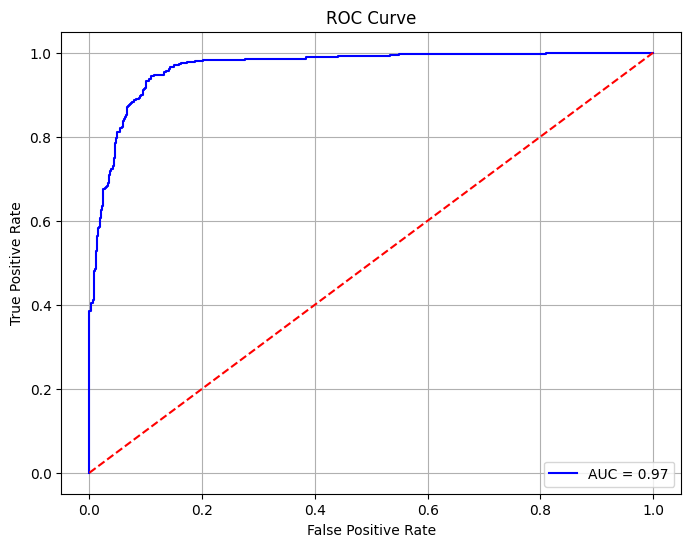

In [ ]:
# d. ROC-AUC Curve
# Probabilities for the positive class
evaluator_auc = BinaryClassificationEvaluator(labelCol="Risk", rawPredictionCol="probability", metricName="areaUnderROC")
auc_score = evaluator_auc.evaluate(predictions)
print(f"ROC-AUC Score: {auc_score:.2f}")

# Extract probabilities and compute ROC curve
probabilities = predictions.select("probability", "Risk").rdd.map(lambda row: (float(row["probability"][1]), row["Risk"])).collect()
probs, labels = zip(*probabilities)

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(labels, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

AUC adalah ukuran area di bawah kurva ROC.
Nilai AUC berkisar antara 0 hingga 1:
1.0: Model sempurna, dapat membedakan semua kelas positif dan negatif tanpa kesalahan.
0.5: Model tidak lebih baik dari tebakan acak (random guessing).
< 0.5: Model memiliki performa lebih buruk dari tebakan acak (tidak diinginkan).
Evaluasi ROC-AUC Score = 0.96
Interpretasi:

Skor 0.96 menunjukkan bahwa model Anda sangat baik dalam membedakan kelas positif dan negatif.
Dengan kata lain, 96% waktu, model Anda memberikan probabilitas lebih tinggi untuk kelas positif dibandingkan kelas negatif.
Manfaat:

AUC adalah metrik yang berguna terutama untuk dataset yang tidak seimbang (jumlah kelas positif dan negatif sangat berbeda), karena tidak hanya bergantung pada satu nilai threshold seperti akurasi.

# 7. SVM

Akurasi Model: 0.87


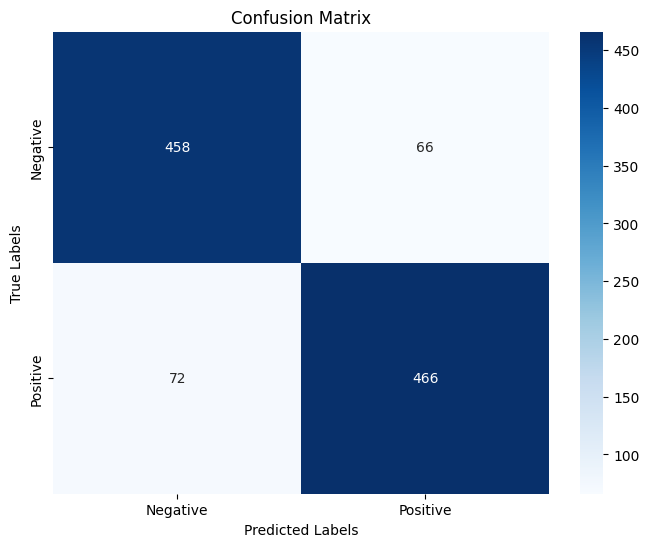


Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.87      0.87       524
    Positive       0.88      0.87      0.87       538

    accuracy                           0.87      1062
   macro avg       0.87      0.87      0.87      1062
weighted avg       0.87      0.87      0.87      1062



In [ ]:
# Import libraries
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyspark.sql.functions import col
from sklearn.metrics import classification_report, roc_curve
from sklearn.model_selection import train_test_split

# Initialize Spark session
spark = SparkSession.builder.appName("SVMClassifier").getOrCreate()

# Assuming train_df and test_df are already created and preprocessed as PySpark DataFrames

# 4. Initialize Support Vector Machine (SVM) Classifier using LinearSVC
svm_classifier = LinearSVC(featuresCol="features", labelCol="Risk", maxIter=100, regParam=0.1, tol=1e-6)

# 5. Fit model with training data
svm_model = svm_classifier.fit(train_df)

# 6. Predict using test data
predictions = svm_model.transform(test_df)

# 7. Evaluate Model
# a. Accuracy
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="Risk", predictionCol="prediction", metricName="accuracy")
accuracy = accuracy_evaluator.evaluate(predictions)
print(f"Akurasi Model: {accuracy:.2f}")

# b. Confusion Matrix
conf_matrix = predictions.groupBy("Risk", "prediction").count().toPandas()
conf_matrix_pivot = conf_matrix.pivot(index="Risk", columns="prediction", values="count").fillna(0)

# c. Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pivot, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# e. Classification Report
def extract_labels_and_predictions(predictions):
    labels_and_preds = predictions.select("Risk", "prediction").rdd.map(lambda row: (row["Risk"], row["prediction"])).collect()
    y_true, y_pred = zip(*labels_and_preds)
    return y_true, y_pred

y_true, y_pred = extract_labels_and_predictions(predictions)
report = classification_report(y_true, y_pred, target_names=["Negative", "Positive"])
print("\nClassification Report:")
print(report)


ROC-AUC Score: 0.95


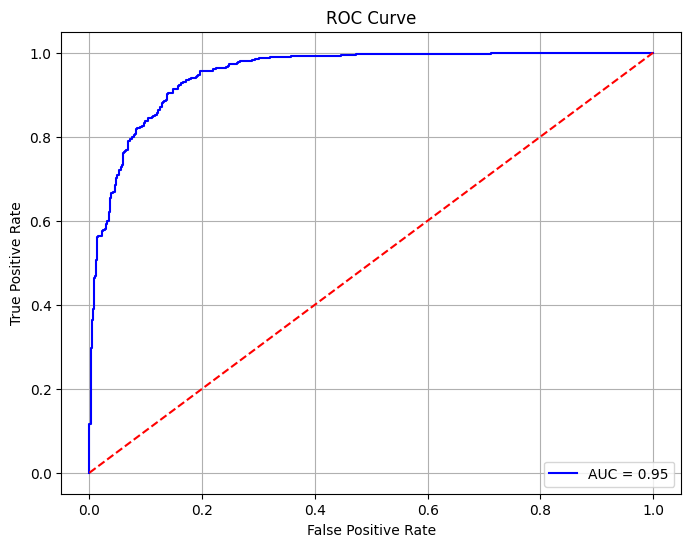

In [ ]:
# d. ROC-AUC Curve
# Probabilities for the positive class
evaluator_auc = BinaryClassificationEvaluator(labelCol="Risk", rawPredictionCol="rawPrediction", metricName="areaUnderROC") # Changed rawPredictionCol to 'rawPrediction'
auc_score = evaluator_auc.evaluate(predictions)
print(f"ROC-AUC Score: {auc_score:.2f}")

# Extract probabilities and compute ROC curve
probabilities = predictions.select("rawPrediction", "Risk").rdd.map(lambda row: (float(row["rawPrediction"][1]), row["Risk"])).collect() # Changed 'probability' to 'rawPrediction'
probs, labels = zip(*probabilities)

fpr, tpr, _ = roc_curve(labels, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 8. Logistic Regresi

Akurasi Model: 0.89


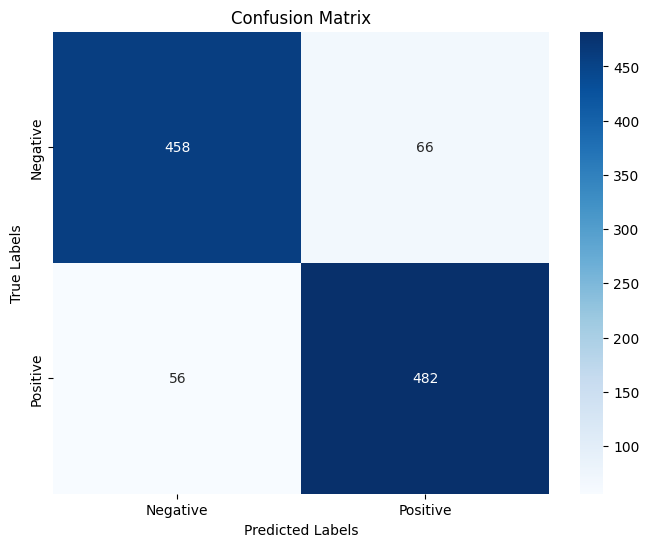


Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88       524
    Positive       0.88      0.90      0.89       538

    accuracy                           0.89      1062
   macro avg       0.89      0.88      0.89      1062
weighted avg       0.89      0.89      0.89      1062



In [ ]:
# Import libraries
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyspark.sql.functions import col
from sklearn.metrics import classification_report, roc_curve
from sklearn.model_selection import train_test_split

# Initialize Spark session
spark = SparkSession.builder.appName("LogisticRegressionClassifier").getOrCreate()

# Assuming train_df and test_df are already created and preprocessed as PySpark DataFrames

# 4. Initialize Logistic Regression Classifier
lr_classifier = LogisticRegression(featuresCol="features", labelCol="Risk", maxIter=100, regParam=0.1, elasticNetParam=0.8)

# 5. Fit model with training data
lr_model = lr_classifier.fit(train_df)

# 6. Predict using test data
predictions = lr_model.transform(test_df)

# 7. Evaluate Model
# a. Accuracy
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="Risk", predictionCol="prediction", metricName="accuracy")
accuracy = accuracy_evaluator.evaluate(predictions)
print(f"Akurasi Model: {accuracy:.2f}")

# b. Confusion Matrix
conf_matrix = predictions.groupBy("Risk", "prediction").count().toPandas()
conf_matrix_pivot = conf_matrix.pivot(index="Risk", columns="prediction", values="count").fillna(0)

# c. Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pivot, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



# e. Classification Report
def extract_labels_and_predictions(predictions):
    labels_and_preds = predictions.select("Risk", "prediction").rdd.map(lambda row: (row["Risk"], row["prediction"])).collect()
    y_true, y_pred = zip(*labels_and_preds)
    return y_true, y_pred

y_true, y_pred = extract_labels_and_predictions(predictions)
report = classification_report(y_true, y_pred, target_names=["Negative", "Positive"])
print("\nClassification Report:")
print(report)


ROC-AUC Score: 0.94


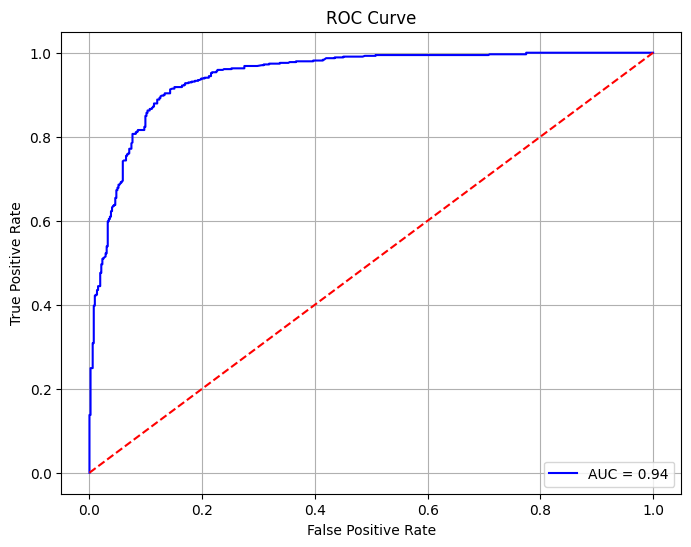

In [ ]:
# d. ROC-AUC Curve
# Probabilities for the positive class
evaluator_auc = BinaryClassificationEvaluator(labelCol="Risk", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc_score = evaluator_auc.evaluate(predictions)
print(f"ROC-AUC Score: {auc_score:.2f}")

# Extract probabilities and compute ROC curve
probabilities = predictions.select("probability", "Risk").rdd.map(lambda row: (float(row["probability"][1]), row["Risk"])).collect()
probs, labels = zip(*probabilities)

fpr, tpr, _ = roc_curve(labels, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 9. HYPERPARAMETER TUNNING  RANDOM FOREST ( CROSS VALIDATION)

Best numTrees: 150
Best maxDepth: <bound method _DecisionTreeParams.getMaxDepth of RandomForestClassificationModel: uid=RandomForestClassifier_920cf69863d8, numTrees=150, numClasses=2, numFeatures=12>
Best maxBins: <bound method _DecisionTreeParams.getMaxBins of RandomForestClassificationModel: uid=RandomForestClassifier_920cf69863d8, numTrees=150, numClasses=2, numFeatures=12>
Akurasi Model Setelah Tuning: 0.92

Classification Report Setelah Tuning:
              precision    recall  f1-score   support

    Negative       0.95      0.89      0.92       524
    Positive       0.90      0.96      0.93       538

    accuracy                           0.92      1062
   macro avg       0.93      0.92      0.92      1062
weighted avg       0.93      0.92      0.92      1062



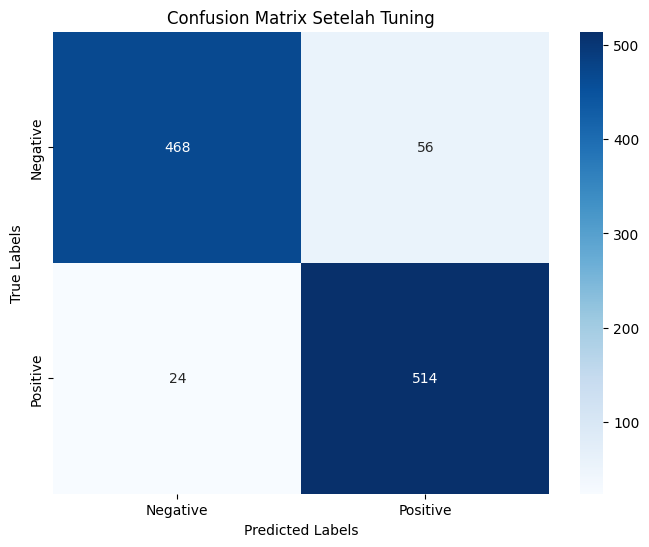

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# 1. Define the parameter grid
param_grid = (ParamGridBuilder()
              .addGrid(rf_classifier.numTrees, [50, 100, 150])  # Number of trees
              .addGrid(rf_classifier.maxDepth, [5, 10, 15])     # Depth of the tree
              .addGrid(rf_classifier.maxBins, [32, 64])         # Number of bins
              .build())

# 2. Define the evaluator
evaluator = BinaryClassificationEvaluator(labelCol="Risk", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

# 3. Set up CrossValidator
cross_validator = CrossValidator(estimator=rf_classifier,
                                  estimatorParamMaps=param_grid,
                                  evaluator=evaluator,
                                  numFolds=5)  # 5-fold cross-validation

# 4. Fit CrossValidator model
cv_model = cross_validator.fit(train_df)

# 5. Best Model
best_model = cv_model.bestModel

# Print best hyperparameters
print(f"Best numTrees: {best_model.getNumTrees}")
print(f"Best maxDepth: {best_model.getMaxDepth}")
print(f"Best maxBins: {best_model.getMaxBins}")

# 6. Predict using test data
predictions = best_model.transform(test_df)

# 7. Evaluate Model
accuracy = accuracy_evaluator.evaluate(predictions)
print(f"Akurasi Model Setelah Tuning: {accuracy:.2f}")

# Extract labels and predictions for sklearn evaluation
y_true, y_pred = extract_labels_and_predictions(predictions)

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_true, y_pred, target_names=["Negative", "Positive"])
print("\nClassification Report Setelah Tuning:")
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Setelah Tuning")
plt.show()


# 10. HYPERTUNNING PARAMETER GRADIEN BOOSTING

Best maxIter: 50
Best maxDepth: 5
Best stepSize: 0.1
Akurasi Model Setelah Tuning: 0.96

Classification Report Setelah Tuning:
              precision    recall  f1-score   support

    Negative       0.93      0.89      0.91       524
    Positive       0.89      0.93      0.91       538

    accuracy                           0.91      1062
   macro avg       0.91      0.91      0.91      1062
weighted avg       0.91      0.91      0.91      1062



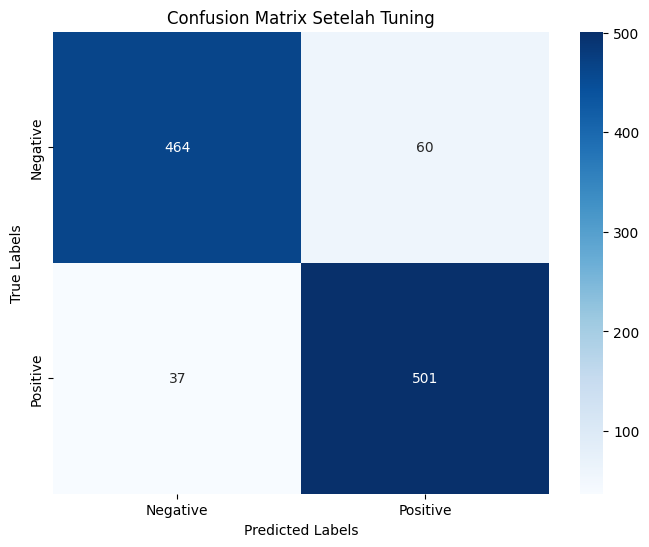

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# 1. Define the parameter grid (reduced combinations)
param_grid = (ParamGridBuilder()
              .addGrid(gbt_classifier.maxIter, [50, 100])        # Reduced iterations
              .addGrid(gbt_classifier.maxDepth, [5, 10])         # Reduced depth
              .addGrid(gbt_classifier.stepSize, [0.1, 0.2])      # Reduced learning rates
              .build())

# 2. Define the evaluator
evaluator = BinaryClassificationEvaluator(labelCol="Risk", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

# 3. Set up CrossValidator (reduced folds)
cross_validator = CrossValidator(estimator=gbt_classifier,
                                  estimatorParamMaps=param_grid,
                                  evaluator=evaluator,
                                  numFolds=3)  # Reduced to 3-fold cross-validation

# 4. Fit CrossValidator model on a smaller subset
train_df_subset = train_df.sample(fraction=0.5, seed=42)  # Use 50% of the training data
cv_model = cross_validator.fit(train_df_subset)

# 5. Best Model
best_model = cv_model.bestModel

# Print best hyperparameters
print(f"Best maxIter: {best_model.getMaxIter()}")
print(f"Best maxDepth: {best_model.getMaxDepth()}")
print(f"Best stepSize: {best_model.getStepSize()}")

# 6. Predict using test data
predictions = best_model.transform(test_df)

# 7. Evaluate Model
# a. Accuracy
accuracy = evaluator.evaluate(predictions)
print(f"Akurasi Model Setelah Tuning: {accuracy:.2f}")

# b. Extract labels and predictions for sklearn evaluation
y_true, y_pred = extract_labels_and_predictions(predictions)

# c. Classification Report
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_true, y_pred, target_names=["Negative", "Positive"])
print("\nClassification Report Setelah Tuning:")
print(report)

# d. Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# e. Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Setelah Tuning")
plt.show()
